In [1]:
import pandas as pd
df = pd.read_excel('DEMO15_최종(추추가.xlsx')

In [2]:
!pip install lightgbm

import lightgbm

print(lightgbm.__version__)

3.3.5


In [3]:
import warnings
warnings.filterwarnings('ignore')

from lightgbm import LGBMClassifier
import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
#맷플랏립 그래프 주피터에서 바로 출력하기
import seaborn as sns

from scipy import stats
from scipy.stats import t, norm, chi2, chi2_contingency
import re
import time

from matplotlib import rc
rc('font', family='Malgun Gothic')      #한글 폰트설정
plt.rcParams['axes.unicode_minus']=False      #마이너스 부호 출력 설정

from sklearn.datasets import load_iris
from sklearn import datasets

import cx_Oracle

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Binarizer

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score

from sklearn import tree
from sklearn.datasets import make_classification

from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

import xgboost    #1.7.5버전
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer

from hyperopt import hp
from hyperopt import fmin, tpe, Trials
from hyperopt import STATUS_OK

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib


# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 사용하고자 하는 한글 폰트 경로 지정
font_prop = fm.FontProperties(fname=font_path)
matplotlib.rc('font', family=font_prop.get_name())

In [5]:
df.fillna(0, inplace=True) # 널값을 모두 0 으로

In [6]:
import warnings

warnings.filterwarnings('ignore')

In [7]:
df_encoded = pd.get_dummies(df[['연령대', '거주지역']])
df = pd.concat([df, df_encoded], axis=1)

In [8]:
# 이분활인것은 요런식으로~
#성별 F가 더 더 벌어주니까 1로 만들어놈, 멤버십 X 도 같은거

df['성별'] = df['성별'].apply(lambda x: 1 if x == 'F' else 0)
df['멤버십'] = df['멤버십'].apply(lambda x: 1 if x == 'X' else 0)
df['고객유형'] = df['고객유형'].apply(lambda x: 1 if x == '충성고객' else 0)


In [9]:
df.head()

,고객번호,성별,연령대,거주지역,멤버십,고객유형,경쟁사횟수,TARGET_15,TARGET_26,TARGET_37,...,거주지역_부산,거주지역_서울,거주지역_세종,거주지역_수도권,거주지역_울산,거주지역_전남,거주지역_전북,거주지역_제주,거주지역_충남,거주지역_충북
0,1,0,노년층,서울,1,1,15.0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2,0,노년층,서울,1,1,8.0,1,1,1,...,0,1,0,0,0,0,0,0,0,0
2,3,0,노년층,서울,1,1,0.0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,4,1,노년층,서울,1,1,3.0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,5,0,노년층,서울,1,0,0.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [10]:
df['연령대_학생층'].describe()

count    19383.000000
mean         0.015477
std          0.123445
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: 연령대_학생층, dtype: float64

In [11]:
df['남성_학생층'] = (df['연령대_학생층'] == 1) & (df['성별'] == 0)
df['여성_학생층'] = (df['연령대_학생층'] == 1) & (df['성별'] == 1)
df['남성_청년층'] = (df['연령대_청년층'] == 1) & (df['성별'] == 0)
df['여성_청년층'] = (df['연령대_청년층'] == 1) & (df['성별'] == 1)

df['남성_학생층'] = df['남성_학생층'].astype(int)
df['여성_학생층'] = df['여성_학생층'].astype(int)
df['남성_청년층'] = df['남성_청년층'].astype(int)
df['여성_청년층'] = df['여성_청년층'].astype(int)


In [12]:
df['남성_중년층'] = (df['연령대_중년층'] == 1) & (df['성별'] == 0)
df['여성_중년층'] = (df['연령대_중년층'] == 1) & (df['성별'] == 1)
df['남성_노년층'] = (df['연령대_노년층'] == 1) & (df['성별'] == 0)
df['여성_노년층'] = (df['연령대_노년층'] == 1) & (df['성별'] == 1)

df['남성_중년층'] = df['남성_중년층'].astype(int)
df['여성_중년층'] = df['여성_중년층'].astype(int)
df['남성_노년층'] = df['남성_노년층'].astype(int)
df['여성_노년층'] = df['여성_노년층'].astype(int)


In [13]:
# 왜곡 정도가 심한 것 중 피처중요도가 높은 것 -> 로그변환
from scipy.stats import skew
column =['경쟁사횟수','총구매금액','계절총액_15','월평균액_6','월평균액_7','월평균액_8','계절총액_26','계절총액_37','계절총액_48','월평균액_15','월평균액_26','평균구매품목수6','평균구매품목수7','평균구매품목수8', '월평균액_37','평균구매품목수15','평균구매품목수26','평균구매품목수37','총방문횟수15','총방문횟수26','총방문횟수37','총방문횟수48']
skew_list = df[column].apply(lambda x: skew(x))
skew_list.sort_values(ascending=False)

KeyError: "['총구매금액'] not in index"

In [12]:
filtered_columns = [col for col in df.columns if '_15' in col]
print(filtered_columns)



['target_15', '계절총액_15', '등급_15', '월평균액_15', '심야비율_15', '오전비율_15', '오후비율_15', '저녁비율_15', '새벽비율_15', 'C0_누적_15', 'C0_절대_15', 'C1_누적_15', 'C1_절대_15', 'C2_누적_15', 'C2_절대_15', 'C3_누적_15', 'C3_절대_15', 'C4_누적_15', 'C4_절대_15', 'C5_누적_15', 'C5_절대_15', 'C6_누적_15', 'C6_절대_15', 'C7_누적_15', 'C7_절대_15', 'C8_누적_15', 'C8_절대_15', 'C9_누적_15', 'C9_절대_15', 'C10_누적_15', 'C10_절대_15', 'C11_누적_15', 'C11_절대_15', 'C12_누적_15', 'C12_절대_15', 'C13_누적_15', 'C13_절대_15', 'T_누적_15', 'T_절대_15']


In [82]:
filtered_columns = [col for col in df.columns if '층' in col]
print(filtered_columns)

['연령대_노년층', '연령대_장년층', '연령대_중년층', '연령대_청년층', '연령대_학생층', '남성_학생층', '여성_학생층', '남성_청년층', '여성_청년층', '남성_중년층', '여성_중년층', '남성_노년층', '여성_노년층']


In [15]:
df.head()

,고객번호,성별,연령대,거주지역,멤버십,고객유형,경쟁사횟수,TARGET_15,TARGET_26,TARGET_37,...,거주지역_충남,거주지역_충북,남성_학생층,여성_학생층,남성_청년층,여성_청년층,남성_중년층,여성_중년층,남성_노년층,여성_노년층
0,1,0,노년층,서울,1,1,15.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,노년층,서울,1,1,8.0,1,1,1,...,0,0,0,0,0,0,0,0,1,0
2,3,0,노년층,서울,1,1,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4,1,노년층,서울,1,1,3.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,노년층,서울,1,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
df2 = df[['TARGET_15', '계절총액_15', '등급_15', '월평균액_15', '평균구매품목수15', '총방문횟수15', '주말비율15', '심야비율_15', '오전비율_15', '오후비율_15', '저녁비율_15', '새벽비율_15', 'C0_누적_15', 'C0_절대_15', 'C1_누적_15', 'C1_절대_15', 'C2_누적_15', 'C2_절대_15', 'C3_누적_15', 'C3_절대_15', 'C4_누적_15', 'C4_절대_15', 'C5_누적_15', 'C5_절대_15', 'C6_누적_15', 'C6_절대_15', 'C7_누적_15', 'C7_절대_15', 'C8_누적_15', 'C8_절대_15', 'C9_누적_15', 'C9_절대_15', 'C10_누적_15', 'C10_절대_15', 'C11_누적_15', 'C11_절대_15', 'C12_누적_15', 'C12_절대_15', 'C13_누적_15', 'C13_절대_15', 'A사비율15', 'B사비율15', 'C사비율15', 'D사비율15', 'T_누적_15', 'T_절대_15' , '거주지역_0', '거주지역_강원', '거주지역_경남', '거주지역_경북', '거주지역_광주', '거주지역_대구', '거주지역_대전', '거주지역_부산', '거주지역_서울', '거주지역_세종', '거주지역_수도권', '거주지역_울산', '거주지역_전남', '거주지역_전북', '거주지역_제주', '거주지역_충남', '거주지역_충북','남성_학생층', '여성_학생층', '남성_청년층', '여성_청년층', '남성_중년층', '여성_중년층', '남성_노년층', '여성_노년층']].copy()


In [21]:
df2.head()

,TARGET_15,계절총액_15,등급_15,월평균액_15,평균구매품목수15,총방문횟수15,주말비율15,심야비율_15,오전비율_15,오후비율_15,...,거주지역_충남,거주지역_충북,남성_학생층,여성_학생층,남성_청년층,여성_청년층,남성_중년층,여성_중년층,남성_노년층,여성_노년층
0,1,6.309726e+07,5,1.261945e+07,1.57,489.0,0.26,0.01,0.10,0.68,...,0,0,0,0,0,0,0,0,1,0
1,1,6.526469e+07,5,1.305294e+07,1.68,450.0,0.33,0.00,0.09,0.74,...,0,0,0,0,0,0,0,0,1,0
2,1,2.185141e+06,1,4.370282e+05,2.48,333.0,0.17,0.00,0.14,0.86,...,0,0,0,0,0,0,0,0,1,0
3,1,1.109015e+07,3,2.218029e+06,1.83,308.0,0.18,0.00,0.08,0.83,...,0,0,0,0,0,0,0,0,0,1
4,0,9.912117e+06,3,1.982423e+06,1.69,356.0,0.29,0.00,0.03,0.78,...,0,0,0,0,0,0,0,0,1,0


In [62]:
filtered_columns = [col for col in df.columns if '15' in col]
print(filtered_columns)


['TARGET_15', '계절총액_15', '등급_15', '월평균액_15', '평균구매품목수15', '총방문횟수15', '주말비율15', '심야비율_15', '오전비율_15', '오후비율_15', '저녁비율_15', '새벽비율_15', 'C0_누적_15', 'C0_절대_15', 'C1_누적_15', 'C1_절대_15', 'C2_누적_15', 'C2_절대_15', 'C3_누적_15', 'C3_절대_15', 'C4_누적_15', 'C4_절대_15', 'C5_누적_15', 'C5_절대_15', 'C6_누적_15', 'C6_절대_15', 'C7_누적_15', 'C7_절대_15', 'C8_누적_15', 'C8_절대_15', 'C9_누적_15', 'C9_절대_15', 'C10_누적_15', 'C10_절대_15', 'C11_누적_15', 'C11_절대_15', 'C12_누적_15', 'C12_절대_15', 'C13_누적_15', 'C13_절대_15', 'A사비율15', 'B사비율15', 'C사비율15', 'D사비율15', 'T_누적_15', 'T_절대_15']


In [18]:
df3 = df[['TARGET_26']].copy()

In [19]:
df4 = df[['TARGET_26', '계절총액_26', '등급_6','월평균액_6','평균구매품목수6','총방문횟수26','주말비율6',
        '심야비율_6', '오전비율_6', '오후비율_6', '저녁비율_6', '새벽비율_6', 
         'C0_누적_26', 'C0_절대_26', 'C1_누적_26', 'C1_절대_26', 'C2_누적_26', 'C2_절대_26', 
         'C3_누적_26', 'C3_절대_26', 'C4_누적_26', 'C4_절대_26', 'C5_누적_26', 'C5_절대_26',
         'C6_누적_26','C6_절대_26','C7_누적_26', 'C7_절대_26', 'C8_누적_26', 'C8_절대_26', 'C9_누적_26', 'C9_절대_26', 'C10_누적_26', 'C10_절대_26', 'C11_누적_26', 'C11_절대_26', 'C12_누적_26', 'C12_절대_26', 'C13_누적_26', 'C13_절대_26', 
          'A사비율26', 'B사비율26', 'C사비율26', 'D사비율26', 'T_누적_26', 'T_절대_26',
          '거주지역_0', '거주지역_강원', '거주지역_경남', '거주지역_경북', '거주지역_광주', '거주지역_대구', '거주지역_대전', '거주지역_부산', '거주지역_서울', '거주지역_세종', '거주지역_수도권', '거주지역_울산', '거주지역_전남', '거주지역_전북', '거주지역_제주', '거주지역_충남', '거주지역_충북','남성_학생층', '여성_학생층', '남성_청년층', '여성_청년층', '남성_중년층', '여성_중년층', '남성_노년층', '여성_노년층'
         ]].copy()

In [20]:
df4.head()

,TARGET_26,계절총액_26,등급_6,월평균액_6,평균구매품목수6,총방문횟수26,주말비율6,심야비율_6,오전비율_6,오후비율_6,...,거주지역_충남,거주지역_충북,남성_학생층,여성_학생층,남성_청년층,여성_청년층,남성_중년층,여성_중년층,남성_노년층,여성_노년층
0,0,6.250124e+07,5,8.645718e+06,1.89,486.0,0.31,0.01,0.12,0.65,...,0,0,0,0,0,0,0,0,1,0
1,1,6.035115e+07,5,9.364654e+06,1.63,418.0,0.31,0.00,0.03,0.77,...,0,0,0,0,0,0,0,0,1,0
2,0,2.193845e+06,1,3.148029e+05,2.33,334.0,0.11,0.00,0.11,0.86,...,0,0,0,0,0,0,0,0,1,0
3,0,1.169704e+07,3,1.930887e+06,2.07,331.0,0.26,0.00,0.07,0.78,...,0,0,0,0,0,0,0,0,0,1
4,0,7.547575e+06,1,8.152466e+05,1.50,262.0,0.45,0.00,0.00,0.85,...,0,0,0,0,0,0,0,0,1,0


In [22]:
df5 = df[['TARGET_37']]

In [15]:
column_names = df.columns
print(column_names)


Index(['고객번호', '성별', '연령대', '거주지역', '멤버십', '고객유형', '경쟁사횟수', '총구매금액',
       'target_15', 'target_26',
       ...
       '거주지역_부산', '거주지역_서울', '거주지역_세종', '거주지역_수도권', '거주지역_울산', '거주지역_전남',
       '거주지역_전북', '거주지역_제주', '거주지역_충남', '거주지역_충북'],
      dtype='object', length=233)


In [23]:
df = df.drop(columns=['연령대', '거주지역'])


<Axes: >

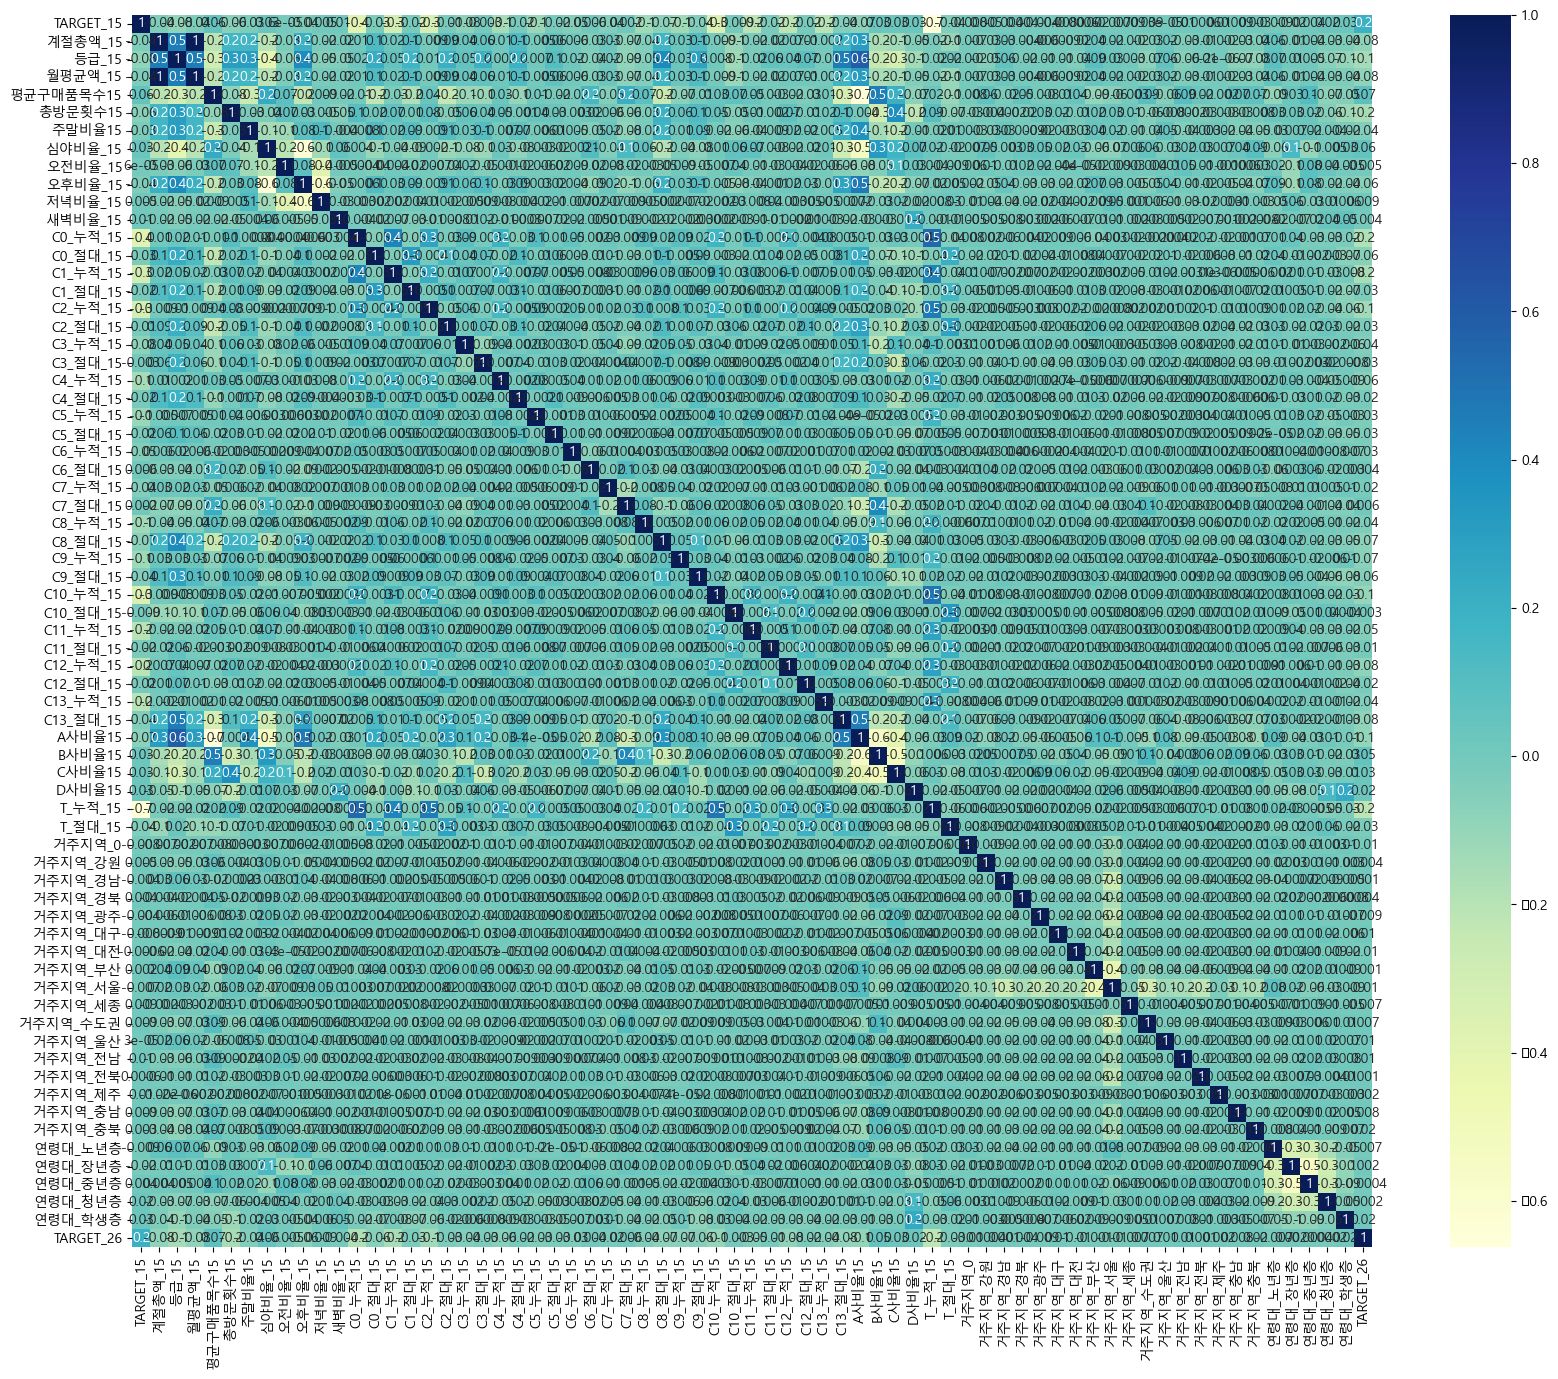

In [21]:
combined_df = pd.concat([df2, df3['TARGET_26']], axis=1)
corr_matrix = combined_df.corr()

plt.figure(figsize=(20,16))
sns.heatmap(corr_matrix , annot=True, fmt='.1g', cmap='YlGnBu')
# corr.TARGET_15.sort_values(ascending=True)

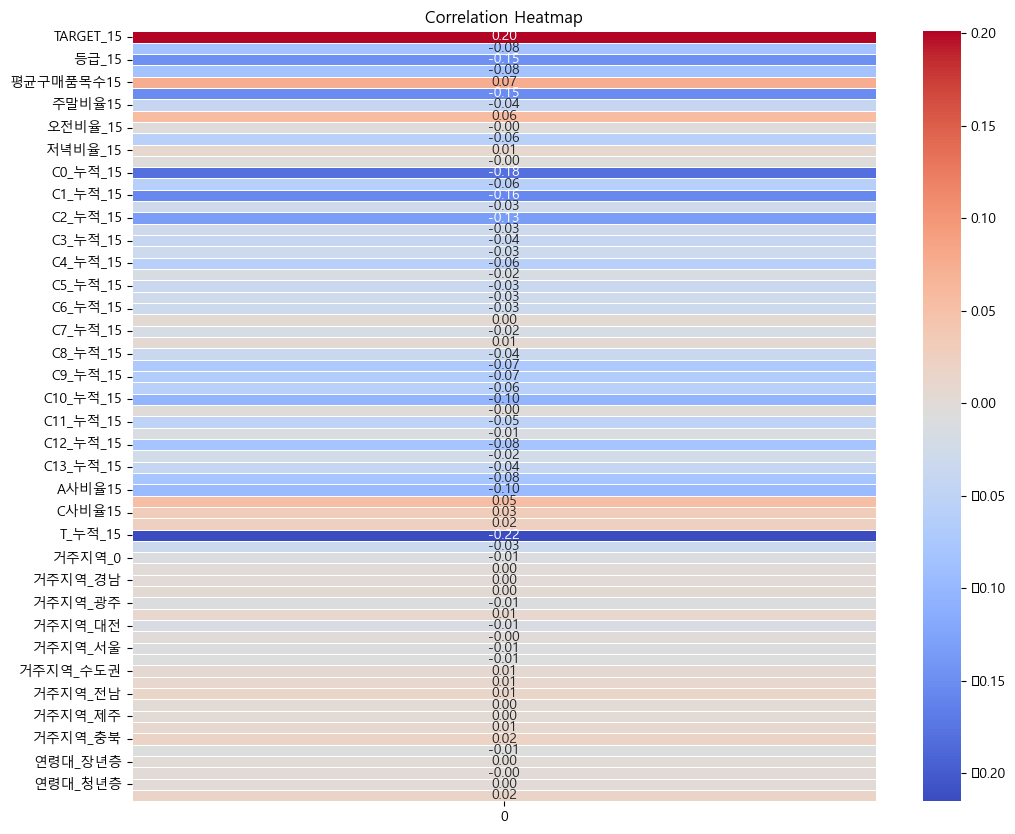

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'target_26' 열과 다른 열들 간의 상관계수 계산
corr_matrix = df2.corrwith(df3['TARGET_26'])

# 히트맵 생성
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [24]:
dataset =  df2.copy() # 1-5분기 
dataset2 = df3.copy() # 6분기
dataset3 = df4.copy() # 2-6분기
dataset4 = df5.copy() # 7분기


In [26]:
dataset5 = df6.copy() # 3-7분기
dataset6 = df7.copy() # 8분기

NameError: name 'df6' is not defined

In [25]:
X_train = dataset

y_train = dataset2

X_validation = dataset3

y_validation = dataset4

In [ ]:

X_test = dataset5

y_test = dataset6

# 로지스틱 회귀 ifier

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)


# 로지스틱 회귀 모델 생성 및 학습
logreg = LogisticRegression(penalty='l2', C=0.1, solver='liblinear', max_iter=200)
logreg.fit(X_train_scaled, y_train)

# 검증 데이터셋으로 모델 평가
validation_accuracy = logreg.score(X_validation_scaled, y_validation)



# 검증 데이터셋 예측 확률 계산
validation_probabilities = logreg.predict_proba(X_validation_scaled)
print("Validation Predicted Probabilities:")
print(validation_probabilities)

# 검증 데이터셋 정확도 계산
validation_accuracy = logreg.score(X_validation_scaled, y_validation)
print("Validation Accuracy:", validation_accuracy)


Validation Predicted Probabilities:
[[0.54077726 0.45922274]
 [0.62423121 0.37576879]
 [0.25413102 0.74586898]
 ...
 [0.05642732 0.94357268]
 [0.07007845 0.92992155]
 [0.17421099 0.82578901]]
Validation Accuracy: 0.6515503276066656


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Define the parameter grid
param_grid = {
    'penalty': [ 'l2'],
    'C': [0.01, 0.1, 1.0, 10.0],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

# Create the logistic regression model
logreg = LogisticRegression()

# Create the scaler for feature scaling
scaler = StandardScaler()

# Scale the training data
X_train_scaled = scaler.fit_transform(X_train)

# Create the grid search object
grid_search = GridSearchCV(logreg, param_grid, cv=5, n_jobs = -1)

# Perform grid search to find the best model
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")


Best Hyperparameters:
C: 0.01
max_iter: 100
penalty: l2
solver: saga


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)


# 로지스틱 회귀 모델 생성 및 학습
logreg = LogisticRegression(penalty='l2', C=0.01, solver='saga', max_iter=100)
logreg.fit(X_train_scaled, y_train)

# 검증 데이터셋으로 모델 평가
validation_accuracy = logreg.score(X_validation_scaled, y_validation)



# 검증 데이터셋 예측 확률 계산
validation_probabilities = logreg.predict_proba(X_validation_scaled)
print("Validation Predicted Probabilities:")
print(validation_probabilities)

# 검증 데이터셋 정확도 계산
validation_accuracy = logreg.score(X_validation_scaled, y_validation)
print("Validation Accuracy:", validation_accuracy)

Validation Predicted Probabilities:
[[0.54237625 0.45762375]
 [0.6209931  0.3790069 ]
 [0.25648537 0.74351463]
 ...
 [0.05751763 0.94248237]
 [0.07181873 0.92818127]
 [0.17310829 0.82689171]]
Validation Accuracy: 0.652014652014652


In [75]:
sc를 전채적용할때 = 65 
전채적용 하지않을때 ['숫자가높은것만 지수화'] = 62

SyntaxError: invalid syntax (831308560.py, line 1)

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression




# 로지스틱 회귀 모델 생성 및 학습
logreg = LogisticRegression(penalty='l2', C=1.0, solver='saga', max_iter=200)
logreg.fit(X_train, y_train)

# 검증 데이터셋으로 모델 평가
validation_accuracy = logreg.score(X_validation, y_validation)



# 검증 데이터셋 예측 확률 계산
validation_probabilities = logreg.predict_proba(X_validation)
print("Validation Predicted Probabilities:")
print(validation_probabilities)

# 검증 데이터셋 정확도 계산
validation_accuracy = logreg.score(X_validation, y_validation)
print("Validation Accuracy:", validation_accuracy)

Validation Predicted Probabilities:
[[0.43907708 0.56092292]
 [0.44096205 0.55903795]
 [0.49784873 0.50215127]
 ...
 [0.49699186 0.50300814]
 [0.49804516 0.50195484]
 [0.49996893 0.50003107]]
Validation Accuracy: 0.6243099623381313


# lgbm

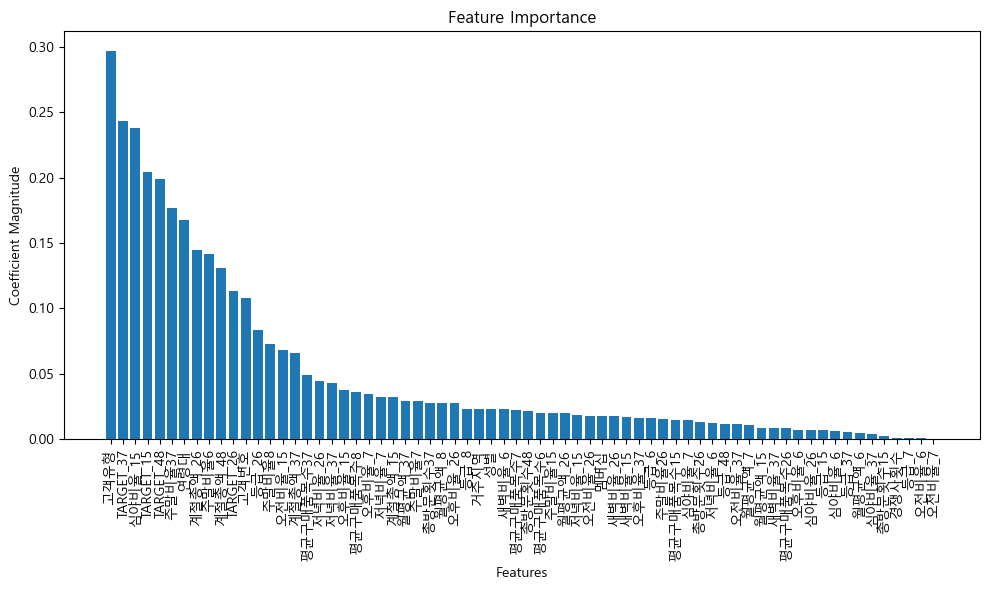

In [36]:
import matplotlib.pyplot as plt

# Get the coefficients of the best logistic regression model
coefficients = best_model.coef_[0]

# Get the absolute values of the coefficients
abs_coefficients = abs(coefficients)

# Get the feature names
feature_names = df.columns

# Sort the feature importance values and feature names
sorted_indices = abs_coefficients.argsort()[::-1]
sorted_coefficients = abs_coefficients[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the feature importance graph
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_coefficients)), sorted_coefficients)
plt.xticks(range(len(sorted_coefficients)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


In [ ]:
X_validation = dataset3

y_validation = dataset4

In [43]:
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)

evals = [(X_train, y_train), (X_validation, y_validation )]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=50, eval_metric="logloss", eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_validation)
pred_proba = lgbm_wrapper.predict_proba(X_validation)[:, 1]

[1]	training's binary_logloss: 0.643751	valid_1's binary_logloss: 0.658588
[2]	training's binary_logloss: 0.639153	valid_1's binary_logloss: 0.654561
[3]	training's binary_logloss: 0.635056	valid_1's binary_logloss: 0.651086
[4]	training's binary_logloss: 0.631245	valid_1's binary_logloss: 0.647934
[5]	training's binary_logloss: 0.627735	valid_1's binary_logloss: 0.645082
[6]	training's binary_logloss: 0.624491	valid_1's binary_logloss: 0.6425
[7]	training's binary_logloss: 0.621429	valid_1's binary_logloss: 0.640051
[8]	training's binary_logloss: 0.61856	valid_1's binary_logloss: 0.637804
[9]	training's binary_logloss: 0.615916	valid_1's binary_logloss: 0.635773
[10]	training's binary_logloss: 0.613438	valid_1's binary_logloss: 0.634052
[11]	training's binary_logloss: 0.611037	valid_1's binary_logloss: 0.632259
[12]	training's binary_logloss: 0.608866	valid_1's binary_logloss: 0.630793
[13]	training's binary_logloss: 0.60674	valid_1's binary_logloss: 0.629367
[14]	training's binary_lo

[128]	training's binary_logloss: 0.516729	valid_1's binary_logloss: 0.608666
[129]	training's binary_logloss: 0.516216	valid_1's binary_logloss: 0.608693
[130]	training's binary_logloss: 0.515672	valid_1's binary_logloss: 0.608751
[131]	training's binary_logloss: 0.515207	valid_1's binary_logloss: 0.608748
[132]	training's binary_logloss: 0.514659	valid_1's binary_logloss: 0.608777
[133]	training's binary_logloss: 0.514174	valid_1's binary_logloss: 0.60884
[134]	training's binary_logloss: 0.513692	valid_1's binary_logloss: 0.608976
[135]	training's binary_logloss: 0.513253	valid_1's binary_logloss: 0.608976
[136]	training's binary_logloss: 0.512741	valid_1's binary_logloss: 0.609001
[137]	training's binary_logloss: 0.512293	valid_1's binary_logloss: 0.609007
[138]	training's binary_logloss: 0.511895	valid_1's binary_logloss: 0.60904
[139]	training's binary_logloss: 0.511359	valid_1's binary_logloss: 0.609003
[140]	training's binary_logloss: 0.510818	valid_1's binary_logloss: 0.609014
[

In [44]:
def get_clf_eval(ytest, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_validation, pred)
    accuracy = accuracy_score(y_validation , pred)
    precision = precision_score(y_validation , pred)
    recall = recall_score(y_validation , pred)
    f1 = f1_score(y_validation ,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_validation, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [45]:
get_clf_eval(y_validation, preds, pred_proba)

오차 행렬
[[ 2149  5133]
 [ 1420 10681]]
정확도: 0.6619, 정밀도: 0.6754, 재현율: 0.8827,    F1: 0.7653, AUC:0.6817


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

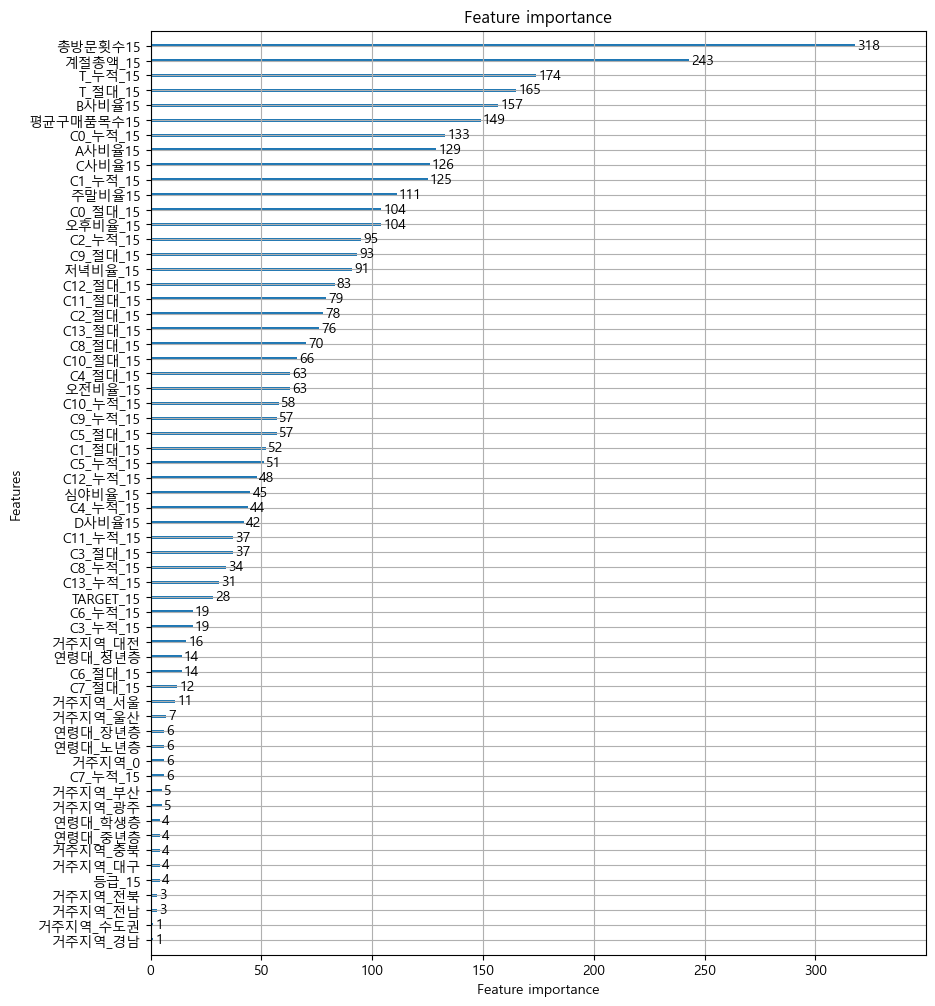

In [46]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

# tree ifer

In [74]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 모델 생성 및 학습
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_scaled, y_train)

# 특성 중요도 추출
feature_importances = rf.feature_importances_

# 각 특성의 중요도 출력
for feature_name, importance in zip(X_train.columns, feature_importances):
    print(f"{feature_name}: {importance}")


TARGET_15: 0.01692077210081385
계절총액_15: 0.037189714436064565
등급_15: 0.008258071502769835
월평균액_15: 0.03804571247898545
평균구매품목수15: 0.03326586233547606
총방문횟수15: 0.05013531284079769
주말비율15: 0.028984154860297706
심야비율_15: 0.02127583503200633
오전비율_15: 0.02445028280456114
오후비율_15: 0.029852465003188958
저녁비율_15: 0.02987291245173985
새벽비율_15: 0.0006070437370100656
C0_누적_15: 0.027159419999169872
C0_절대_15: 0.02273977209804025
C1_누적_15: 0.023300600682463316
C1_절대_15: 0.021524715974658853
C2_누적_15: 0.021287014119175395
C2_절대_15: 0.022746987113357445
C3_누적_15: 0.009240435508571017
C3_절대_15: 0.012720223313474511
C4_누적_15: 0.019863061445549092
C4_절대_15: 0.022979033571519987
C5_누적_15: 0.015766121872455564
C5_절대_15: 0.021110263472078044
C6_누적_15: 0.006178047764899097
C6_절대_15: 0.00870987736858304
C7_누적_15: 0.003807380674842449
C7_절대_15: 0.006649431799229609
C8_누적_15: 0.011466471601056608
C8_절대_15: 0.01754652584243446
C9_누적_15: 0.015105873575928602
C9_절대_15: 0.022007489155564164
C10_누적_15: 0.019310153605005

# 군집

# 여기 가기전에 정확도 제일 높은걸로 pred 를 트레인에 붙여서 감소를 예측한 인원들에게 상품추천

In [32]:
import pandas as pd

# 검증 데이터셋의 입력 변수를 데이터 프레임으로 생성
validation_df = pd.DataFrame(X_validation, columns=X_validation.columns)

# 검증 데이터셋 예측결과를 원본 데이터 프레임에 추가
df['Prediction'] = logreg.predict(X_validation_scaled)

# 검증 데이터셋 예측 결과를 포함한 데이터 프레임 출력
df.head()


,고객번호,성별,멤버십,고객유형,경쟁사횟수,TARGET_15,TARGET_26,TARGET_37,TARGET_48,계절총액_15,...,거주지역_충북,남성_학생층,여성_학생층,남성_청년층,여성_청년층,남성_중년층,여성_중년층,남성_노년층,여성_노년층,Prediction
0,1,0,1,1,15.0,1,0,0,0,6.309726e+07,...,0,0,0,0,0,0,0,1,0,1
1,2,0,1,1,8.0,1,1,1,1,6.526469e+07,...,0,0,0,0,0,0,0,1,0,1
2,3,0,1,1,0.0,1,0,0,0,2.185141e+06,...,0,0,0,0,0,0,0,1,0,0
3,4,1,1,1,3.0,1,0,0,0,1.109015e+07,...,0,0,0,0,0,0,0,0,1,0
4,5,0,1,0,0.0,0,0,0,1,9.912117e+06,...,0,0,0,0,0,0,0,1,0,0


In [34]:
# 'Prediction'이 0인 경우만 남기기
df_filtered = df[df['Prediction'] == 0]


In [37]:
df_filtered.head()

,고객번호,성별,멤버십,고객유형,경쟁사횟수,TARGET_15,TARGET_26,TARGET_37,TARGET_48,계절총액_15,...,거주지역_충북,남성_학생층,여성_학생층,남성_청년층,여성_청년층,남성_중년층,여성_중년층,남성_노년층,여성_노년층,Prediction
2,3,0,1,1,0.0,1,0,0,0,2.185141e+06,...,0,0,0,0,0,0,0,1,0,0
3,4,1,1,1,3.0,1,0,0,0,1.109015e+07,...,0,0,0,0,0,0,0,0,1,0
4,5,0,1,0,0.0,0,0,0,1,9.912117e+06,...,0,0,0,0,0,0,0,1,0,0
5,6,1,1,1,0.0,1,0,1,1,1.507443e+07,...,0,0,0,0,0,0,0,0,1,0
9,10,1,1,1,0.0,1,1,1,0,1.229371e+07,...,0,0,0,0,0,0,0,0,1,0


In [38]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#표준화
sc = StandardScaler()
cc_scaled = sc.fit_transform(df_filtered)
cc_scaled = pd.DataFrame(cc_scaled) 
cc_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,229,230,231,232,233,234,235,236,237,238
0,-1.919409,-2.133506,0.753306,0.186560,-0.367063,0.720585,-1.397305,-1.362535,-1.150469,-1.409174,...,-0.155278,-0.051525,-0.134141,-0.182412,-0.32929,-0.270992,-0.608607,6.351629,-0.355770,0.0
1,-1.919226,0.468712,0.753306,0.186560,0.535619,0.720585,-1.397305,-1.362535,-1.150469,0.407085,...,-0.155278,-0.051525,-0.134141,-0.182412,-0.32929,-0.270992,-0.608607,-0.157440,2.810807,0.0
2,-1.919044,-2.133506,0.753306,-5.360216,-0.367063,-1.387761,-1.397305,-1.362535,0.869211,0.166815,...,-0.155278,-0.051525,-0.134141,-0.182412,-0.32929,-0.270992,-0.608607,6.351629,-0.355770,0.0
3,-1.918862,0.468712,0.753306,0.186560,-0.367063,0.720585,-1.397305,0.733926,0.869211,1.219717,...,-0.155278,-0.051525,-0.134141,-0.182412,-0.32929,-0.270992,-0.608607,-0.157440,2.810807,0.0
4,-1.918133,0.468712,0.753306,0.186560,-0.367063,0.720585,0.715663,0.733926,-1.150469,0.652563,...,-0.155278,-0.051525,-0.134141,-0.182412,-0.32929,-0.270992,-0.608607,-0.157440,2.810807,0.0


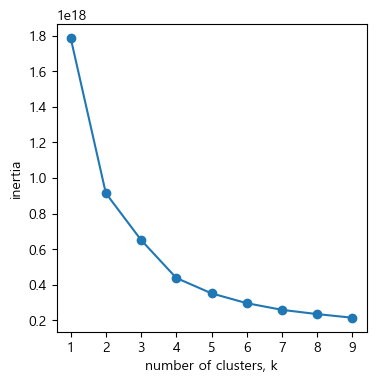

In [39]:
from sklearn.cluster import KMeans
# 적절한 군집수 찾기 그냥 df
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_filtered)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

5개

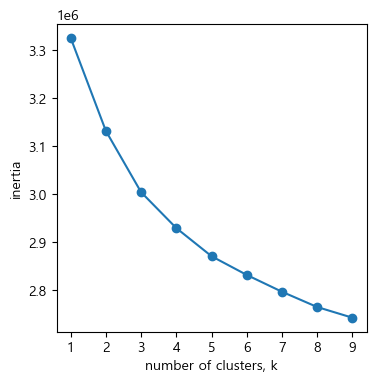

In [42]:
from sklearn.cluster import KMeans
# 적절한 군집수 찾기 표준편차에 군집
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(cc_scaled)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

8개

# 군집 개수 찾기

In [96]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#표준화
sc = StandardScaler()
cc_scaled = sc.fit_transform(v_df)
cc_scaled = pd.DataFrame(cc_scaled) 
cc_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
0,-1.356313,1.002560,1.414141,0.441801,-0.533284,1.106182,0.035229,-0.642136,0.414483,1.020272,-0.757835,-0.051478,0.794048,-0.459882,0.912971,1.472736,0.860509,0.018088,0.26462,-0.809187,0.012040,1.166488,2.216099,0.073901,0.034061,-0.466053,0.073611,-0.44908,0.050246,1.191314,-1.849244,-0.015934,-0.475660,-0.651366,0.868269,1.632607,0.674773,-0.855982,0.017948,2.652321,1.210179,-0.848729,-0.274429,-0.126326,0.000000,-0.751276,-0.096273,-0.095999,-0.215473,-0.13342,-0.184637,-0.129768,-0.134815,-0.331774,0.798691,-0.040665,-0.241839,-0.106406,-0.124103,-0.173749,-0.025906,-0.110544,-0.13322,-0.044901,-0.11683,-0.169125,-0.322399,-0.265796,-0.60288,5.946920,-0.388687,-2.221846
1,0.737293,0.949656,1.414141,0.516654,-0.709406,0.499226,0.035229,-0.699016,-0.525340,1.566344,-0.861000,-0.051478,2.382103,0.558994,0.912971,-0.850773,0.000355,-1.465414,0.26462,-0.809187,0.012040,-0.631584,2.532950,2.927647,0.034061,2.288715,0.073611,-0.44908,2.269870,2.208484,1.892428,1.305954,0.005059,0.642143,0.254418,-0.595913,0.360846,-1.034074,1.639807,0.308405,1.617865,-0.958581,-0.632714,0.118759,0.000000,0.600937,-0.096273,-0.095999,-0.215473,-0.13342,-0.184637,-0.129768,-0.134815,-0.331774,0.798691,-0.040665,-0.241839,-0.106406,-0.124103,-0.173749,-0.025906,-0.110544,-0.13322,-0.044901,-0.11683,-0.169125,-0.322399,-0.265796,-0.60288,5.946920,-0.388687,-2.221846
2,-1.356313,-0.481342,-1.414287,-0.425585,-0.235231,-0.250543,-1.287204,-0.699016,0.310058,1.975899,-1.686315,-0.051478,0.397034,-1.224039,0.456486,1.182298,0.000355,-1.465414,0.26462,-0.809187,0.012040,-1.350812,-0.001864,-0.977479,0.034061,-0.466053,0.073611,-0.44908,0.050246,0.739238,0.131641,-1.337822,1.447219,-0.651366,-0.052508,-1.391813,0.046920,-1.568347,0.017948,-0.863554,-0.852765,-1.005220,2.036095,-0.126326,0.537881,-1.089330,-0.096273,-0.095999,-0.215473,-0.13342,-0.184637,-0.129768,-0.134815,-0.331774,0.798691,-0.040665,-0.241839,-0.106406,-0.124103,-0.173749,-0.025906,-0.110544,-0.13322,-0.044901,-0.11683,-0.169125,-0.322399,-0.265796,-0.60288,5.946920,-0.388687,0.450076
3,-1.356313,-0.247510,-0.000073,-0.257324,-0.411353,-0.277321,-0.295380,-0.699016,-0.107641,1.611850,-1.118911,-0.051478,0.794048,0.558994,0.456486,0.601421,-0.859799,1.007089,0.26462,1.114698,0.012040,1.526102,-1.902974,1.425676,0.034061,-0.466053,0.073611,-0.44908,0.050246,-0.843027,1.672330,-0.256277,0.485779,-1.168770,0.561344,-0.755093,0.674773,0.924929,2.180427,0.074013,0.885482,-0.645665,-0.164395,-0.126326,1.075762,-0.751276,-0.096273,-0.095999,-0.215473,-0.13342,-0.184637,-0.129768,-0.134815,-0.331774,0.798691,-0.040665,-0.241839,-0.106406,-0.124103,-0.173749,-0.025906,-0.110544,-0.13322,-0.044901,-0.11683,-0.169125,-0.322399,-0.265796,-0.60288,-0.168154,2.572762,0.450076
4,-1.356313,-0.349610,-1.414287,-0.373481,-0.797467,-0.893203,0.960932,-0.699016,-0.838614,1.930393,-1.118911,-0.051478,1.191062,2.342027,2.282428,0.601421,1.290587,3.726843,0.26462,-0.568701,2.583671,1.166488,2.216099,0.073901,0.034061,-0.466053,0.073611,-0.44908,2.023245,0.061125,0.131641,0.584925,2.408658,2.970460,-0.052508,0.199987,1.930480,-0.499800,1.910117,-0.043183,1.707624,-1.011085,-0.632714,-0.025655,2.151523,3.305364,-0.096273,-0.095999,-0.215473,-0.13342,-0.184637,-0.129768,-0.134815,-0.331774,0.798691,-0.040665,-0.241839,-0.106406,-0.124103,-0.173749,-0.025906,-0.110544,-0.13322,-0.044901,-0.11683,-0.169125,-0.322399,-0.265796,-0.60288,5.946920,-0.388687,-2.221846


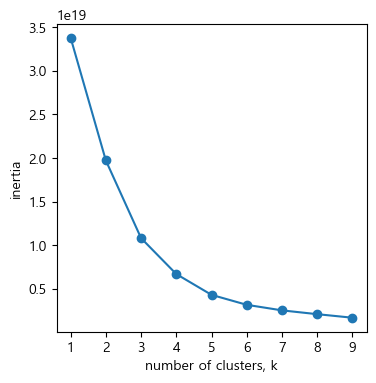

In [97]:
from sklearn.cluster import KMeans
# 적절한 군집수 찾기 그냥 df
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(v_df)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

###### 약 6개?

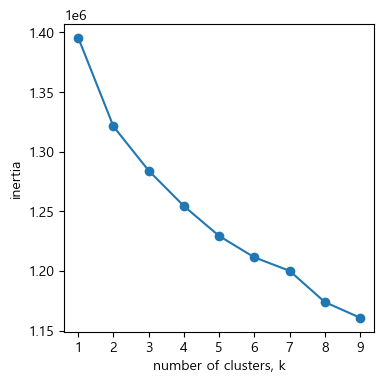

In [98]:
from sklearn.cluster import KMeans
# 적절한 군집수 찾기 표준편차에 군집
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(cc_scaled)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# 약 8개?

In [44]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [45]:
  
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
   
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

IndexError: list index out of range

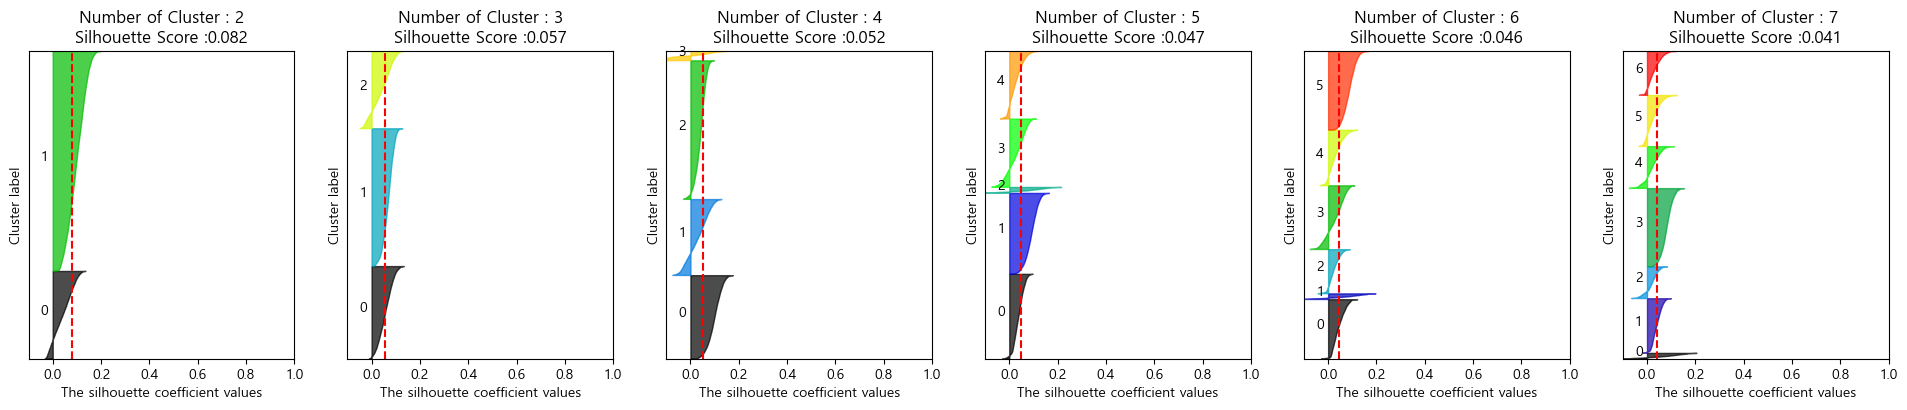

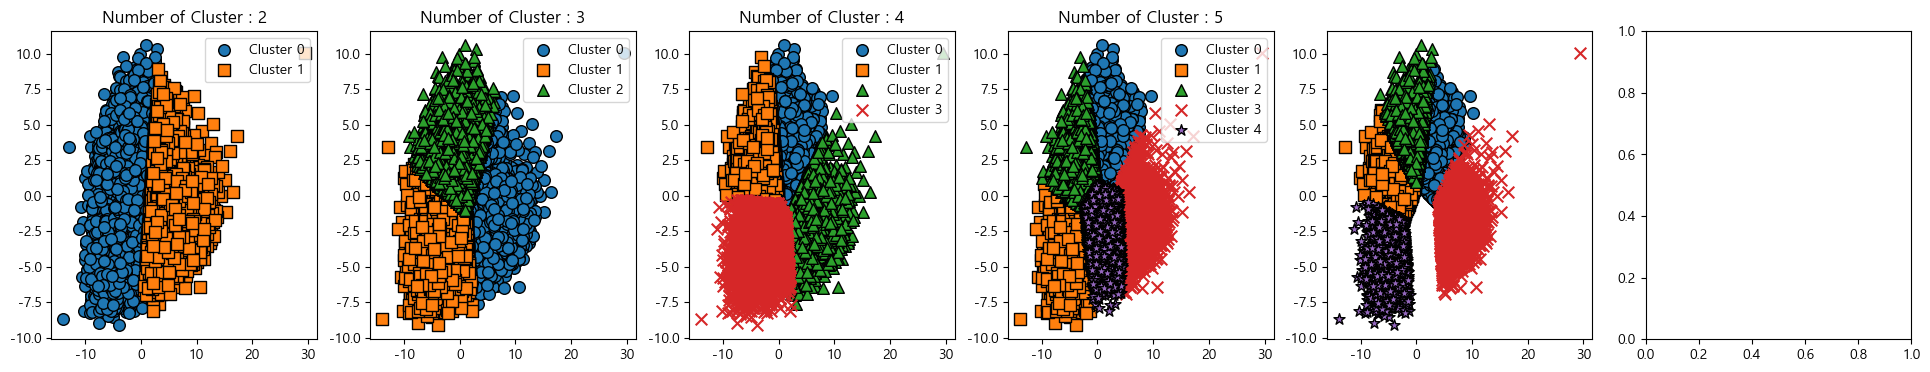

In [47]:
visualize_silhouette([2,3,4,5,6,7],cc_scaled)
visualize_kmeans_plot_multi([2,3,4,5,6,7],cc_scaled)

In [49]:
df_filtered = df_filtered.drop(['Prediction' ], axis=1)

IndexError: list index out of range

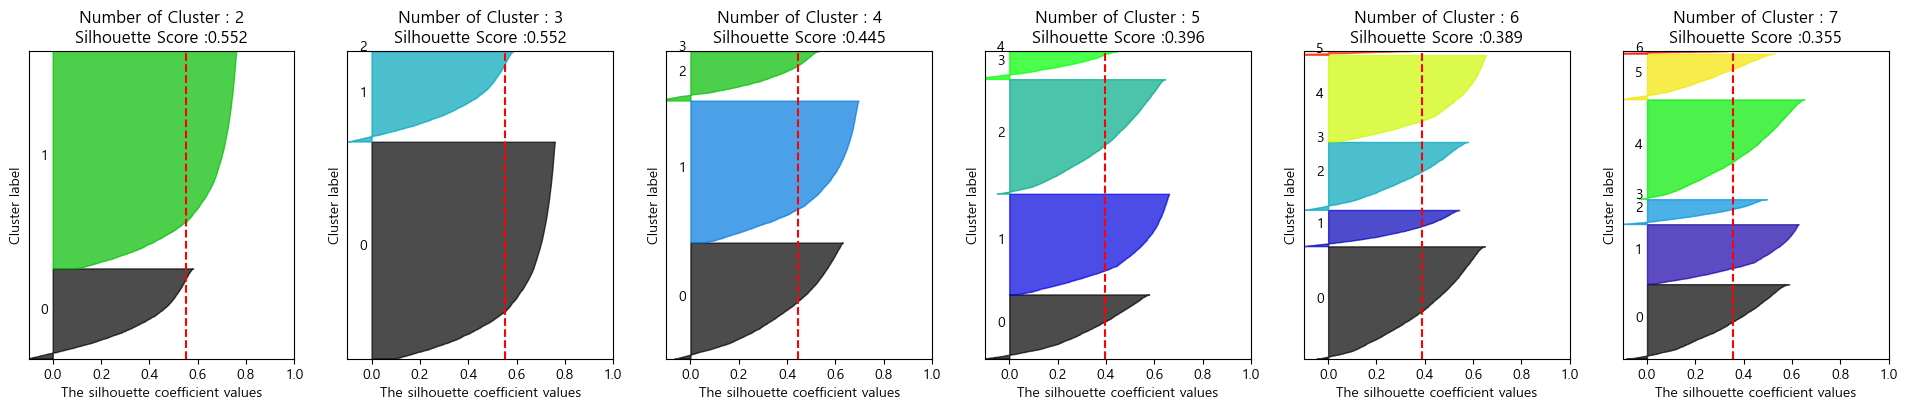

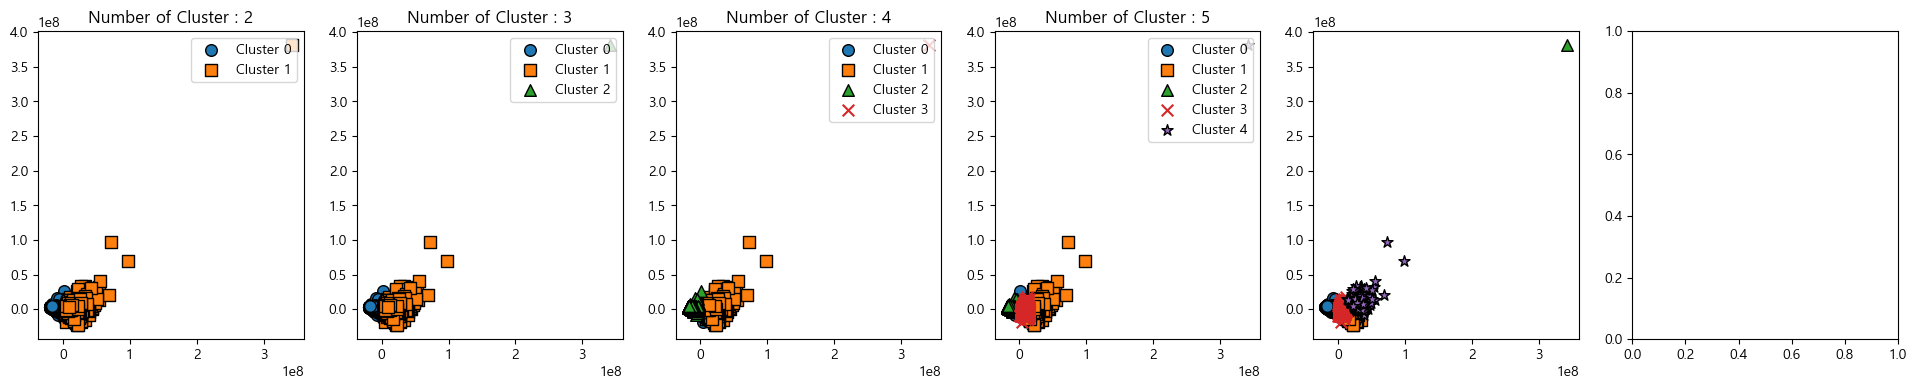

In [50]:
visualize_silhouette([2,3,4,5,6,7],df_filtered)
visualize_kmeans_plot_multi([2,3,4,5,6,7],df_filtered)

In [52]:
# K-Means 모델과 군집 예측값을 생성

# 클러스터 모델 생성 파라미터는 원할 경우 추가
clust_model = KMeans(n_clusters = 4 # 클러스터 갯수
#                      , n_init=10 # initial centroid를 몇번 샘플링한건지, 데이터가 많으면 많이 돌릴수록안정화된 결과가 나옴
#                      , max_iter=500 # KMeans를 몇번 반복 수행할건지, K가 큰 경우 1000정도로 높여준다
#                      , random_state = 42
#                      , algorithm='auto'
                    )

# 생성한 모델로 데이터를 학습시킴
clust_model.fit(df_filtered) # unsupervised learning 

# 결과 값을 변수에 저장
centers = clust_model.cluster_centers_ # 각 군집의 중심점
pred = clust_model.predict(df_filtered) # 각 예측군집

print(pd.DataFrame(centers))
print(pred[:10]) 
# 군집을 나누는 걸 학습시켯다 이제 원본에 넣어보자

            0         1         2         3         4         5         6    \
0  11456.083062  0.809081  0.635518  0.943592  0.871998  0.651635  0.676430   
1   9105.906821  0.812751  0.649131  0.986179  1.983950  0.646010  0.609452   
2  10006.369528  0.836081  0.636157  0.985787  1.320826  0.671404  0.664772   
3   8021.000000  1.000000  1.000000  1.000000  0.000000  1.000000  1.000000   

        7         8             9    ...       228       229       230  \
0  0.667906  0.603130  5.347780e+06  ...  0.021695  0.027894  0.004804   
1  0.619260  0.553277  1.710402e+07  ...  0.003121  0.007133  0.000446   
2  0.640894  0.535532  1.027110e+07  ...  0.014971  0.025204  0.000948   
3  1.000000  1.000000  8.675326e+06  ...  0.000000  0.000000  0.000000   

        231       232       233       234       235       236       237  
0  0.028359  0.042616  0.101348  0.064931  0.252906  0.027584  0.118859  
1  0.007579  0.019617  0.110120  0.070441  0.284886  0.028533  0.112795  
2  0.008907

In [56]:
df_filtered.head()

,고객번호,성별,멤버십,고객유형,경쟁사횟수,TARGET_15,TARGET_26,TARGET_37,TARGET_48,계절총액_15,...,거주지역_충남,거주지역_충북,남성_학생층,여성_학생층,남성_청년층,여성_청년층,남성_중년층,여성_중년층,남성_노년층,여성_노년층
2,3,0,1,1,0.0,1,0,0,0,2.185141e+06,...,0,0,0,0,0,0,0,0,1,0
3,4,1,1,1,3.0,1,0,0,0,1.109015e+07,...,0,0,0,0,0,0,0,0,0,1
4,5,0,1,0,0.0,0,0,0,1,9.912117e+06,...,0,0,0,0,0,0,0,0,1,0
5,6,1,1,1,0.0,1,0,1,1,1.507443e+07,...,0,0,0,0,0,0,0,0,0,1
9,10,1,1,1,0.0,1,1,1,0,1.229371e+07,...,0,0,0,0,0,0,0,0,0,1


In [54]:
cluster_mean= df_new.groupby('cluster').mean()
cluster_mean

KeyError: 'cluster'

In [53]:
df_new = df_filtered.copy() #혹시모르니 카피


In [104]:
df_new['cluster'] = pred # pred 는 위에서 봣듯이 군집예측임 이걸 원본에 넣음
df_new.head()

,TARGET_26,계절총액_26,등급_6,월평균액_6,평균구매품목수6,총방문횟수26,주말비율6,심야비율_6,오전비율_6,오후비율_6,저녁비율_6,새벽비율_6,C0_누적_26,C0_절대_26,C1_누적_26,C1_절대_26,C2_누적_26,C2_절대_26,C3_누적_26,C3_절대_26,C4_누적_26,C4_절대_26,C5_누적_26,C5_절대_26,C6_누적_26,C6_절대_26,C7_누적_26,C7_절대_26,C8_누적_26,C8_절대_26,C9_누적_26,C9_절대_26,C10_누적_26,C10_절대_26,C11_누적_26,C11_절대_26,C12_누적_26,C12_절대_26,C13_누적_26,C13_절대_26,A사비율26,B사비율26,C사비율26,D사비율26,T_누적_26,T_절대_26,거주지역_0,거주지역_강원,거주지역_경남,거주지역_경북,거주지역_광주,거주지역_대구,거주지역_대전,거주지역_부산,거주지역_서울,거주지역_세종,거주지역_수도권,거주지역_울산,거주지역_전남,거주지역_전북,거주지역_제주,거주지역_충남,거주지역_충북,남성_학생층,여성_학생층,남성_청년층,여성_청년층,남성_중년층,여성_중년층,남성_노년층,여성_노년층,Prediction,cluster
0,0,6.250124e+07,5,8.645718e+06,1.89,486.0,0.31,0.01,0.12,0.65,0.22,0.0,2,4,2,10,2,6,0,0,0,14,7,7,0,0,0,0,0,18,-9,11,-1,3,3,19,2,4,0,30,0.798726,0.067516,0.133758,0.000000,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5
1,1,6.035115e+07,5,9.364654e+06,1.63,418.0,0.31,0.00,0.03,0.77,0.20,0.0,6,8,2,2,0,0,0,0,0,4,8,26,0,18,0,0,9,27,8,22,0,8,1,5,1,3,6,10,0.956332,0.021834,0.000000,0.021834,0,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5
2,0,2.193845e+06,1,3.148029e+05,2.33,334.0,0.11,0.00,0.11,0.86,0.04,0.0,1,1,1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,3,3,0,0,0,0,0,0,0.001220,0.002439,0.996341,0.000000,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0,1.169704e+07,3,1.930887e+06,2.07,331.0,0.26,0.00,0.07,0.78,0.15,0.0,2,8,1,7,-2,10,0,16,0,16,-6,16,0,0,0,0,0,0,7,9,1,1,2,4,2,14,8,8,0.673203,0.151961,0.174837,0.000000,2,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,0,7.547575e+06,1,8.152466e+05,1.50,262.0,0.45,0.00,0.00,0.85,0.15,0.0,3,15,5,7,3,21,0,2,8,14,7,7,0,0,0,0,8,8,0,16,5,17,0,10,6,6,7,7,0.991031,0.000000,0.000000,0.008969,4,14,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [72]:
import pandas as pd

# 모든 열 출력을 위한 설정 변경
pd.set_option('display.max_columns', None)



In [57]:
df_new['cluster'] = pred # pred 는 위에서 봣듯이 군집예측임 이걸 원본에 넣음
df_new.head()

,고객번호,성별,멤버십,고객유형,경쟁사횟수,TARGET_15,TARGET_26,TARGET_37,TARGET_48,계절총액_15,...,거주지역_충북,남성_학생층,여성_학생층,남성_청년층,여성_청년층,남성_중년층,여성_중년층,남성_노년층,여성_노년층,cluster
2,3,0,1,1,0.0,1,0,0,0,2.185141e+06,...,0,0,0,0,0,0,0,1,0,0
3,4,1,1,1,3.0,1,0,0,0,1.109015e+07,...,0,0,0,0,0,0,0,0,1,2
4,5,0,1,0,0.0,0,0,0,1,9.912117e+06,...,0,0,0,0,0,0,0,1,0,0
5,6,1,1,1,0.0,1,0,1,1,1.507443e+07,...,0,0,0,0,0,0,0,0,1,1
9,10,1,1,1,0.0,1,1,1,0,1.229371e+07,...,0,0,0,0,0,0,0,0,1,2


In [58]:
cluster_mean= df_new.groupby('cluster').mean()
cluster_mean
# 그룹화 완료 

,고객번호,성별,멤버십,고객유형,경쟁사횟수,TARGET_15,TARGET_26,TARGET_37,TARGET_48,계절총액_15,...,거주지역_충남,거주지역_충북,남성_학생층,여성_학생층,남성_청년층,여성_청년층,남성_중년층,여성_중년층,남성_노년층,여성_노년층
cluster,,,,,,,,,,,,,,,,,,,,,
0,11456.083062,0.809081,0.635518,0.943592,0.871998,0.651635,0.676430,0.667906,0.603130,5.347780e+06,...,0.021695,0.027894,0.004804,0.028359,0.042616,0.101348,0.064931,0.252906,0.027584,0.118859
1,9105.906821,0.812751,0.649131,0.986179,1.983950,0.646010,0.609452,0.619260,0.553277,1.710402e+07,...,0.003121,0.007133,0.000446,0.007579,0.019617,0.110120,0.070441,0.284886,0.028533,0.112795
2,10006.369528,0.836081,0.636157,0.985787,1.320826,0.671404,0.664772,0.640894,0.535532,1.027110e+07,...,0.014971,0.025204,0.000948,0.008907,0.024825,0.088308,0.071821,0.285200,0.018192,0.104226
3,8021.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,8.675326e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000


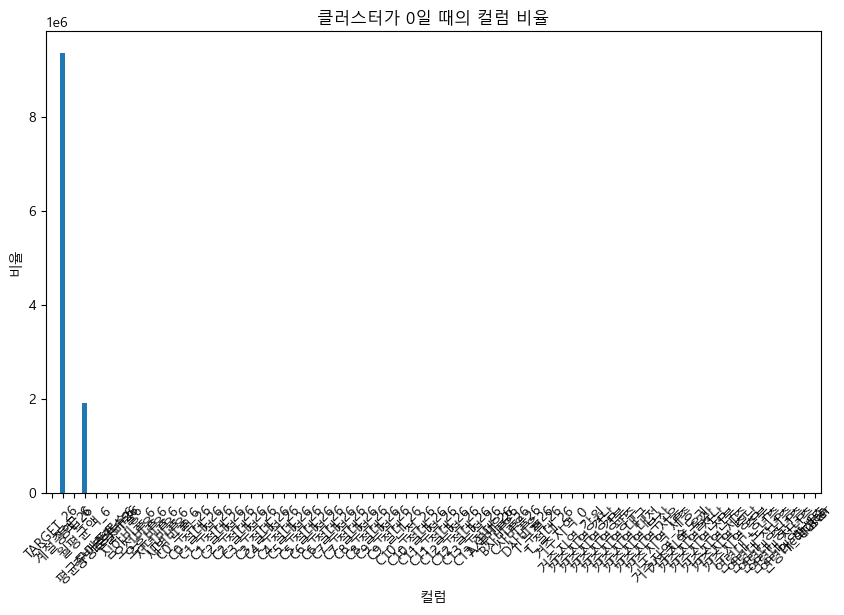

In [79]:
import matplotlib.pyplot as plt
import pandas as pd

# cluster가 0인 행만 필터링하여 DataFrame 생성
cluster_0_df = df_new[df_new['cluster'] == 0]

# 각 컬럼의 비율 계산
column_proportions = cluster_0_df.sum() / cluster_0_df.shape[0]

# 스택형 막대 그래프 생성
plt.figure(figsize=(10, 6))
column_proportions.plot(kind='bar', stacked=True)
plt.xlabel('컬럼')
plt.ylabel('비율')
plt.title('클러스터가 0일 때의 컬럼 비율')
plt.xticks(rotation=45)
plt.show()


In [81]:
import pandas as pd

# cluster가 0인 행만 필터링하여 DataFrame 생성
cluster_0_df = df_new[df_new['cluster'] == 0]

# 각 컬럼의 비율 계산
column_proportions = cluster_0_df.sum() / cluster_0_df.shape[0]


print("클러스터가 0일 때의 컬럼 비율:")
for column, proportion in column_proportions.items():
    print(f"{column}: {proportion:.2f}")

클러스터가 0일 때의 컬럼 비율:
TARGET_26: 0.67
계절총액_26: 9359058.08
등급_6: 2.40
월평균액_6: 1920675.95
평균구매품목수6: 3.01
총방문횟수26: 348.13
주말비율6: 0.28
심야비율_6: 0.16
오전비율_6: 0.08
오후비율_6: 0.38
저녁비율_6: 0.37
새벽비율_6: 0.00
C0_누적_26: -0.03
C0_절대_26: 5.29
C1_누적_26: -0.07
C1_절대_26: 4.56
C2_누적_26: 0.01
C2_절대_26: 5.63
C3_누적_26: -1.25
C3_절대_26: 6.19
C4_누적_26: -0.04
C4_절대_26: 6.96
C5_누적_26: -0.02
C5_절대_26: 6.25
C6_누적_26: -0.12
C6_절대_26: 3.34
C7_누적_26: -0.20
C7_절대_26: 3.73
C8_누적_26: -0.21
C8_절대_26: 5.53
C9_누적_26: -0.72
C9_절대_26: 10.20
C10_누적_26: -0.01
C10_절대_26: 5.97
C11_누적_26: 0.22
C11_절대_26: 8.90
C12_누적_26: -0.22
C12_절대_26: 8.82
C13_누적_26: -0.04
C13_절대_26: 5.51
A사비율26: 0.20
B사비율26: 0.50
C사비율26: 0.29
D사비율26: 0.01
T_누적_26: 0.01
T_절대_26: 4.48
거주지역_0: 0.01
거주지역_강원: 0.01
거주지역_경남: 0.04
거주지역_경북: 0.02
거주지역_광주: 0.03
거주지역_대구: 0.02
거주지역_대전: 0.02
거주지역_부산: 0.09
거주지역_서울: 0.60
거주지역_세종: 0.00
거주지역_수도권: 0.07
거주지역_울산: 0.01
거주지역_전남: 0.02
거주지역_전북: 0.03
거주지역_제주: 0.00
거주지역_충남: 0.02
거주지역_충북: 0.02
연령대_노년층: 0.14
연령대_장년층: 0.37
연령대_중년층: 0.34
연령대_청년

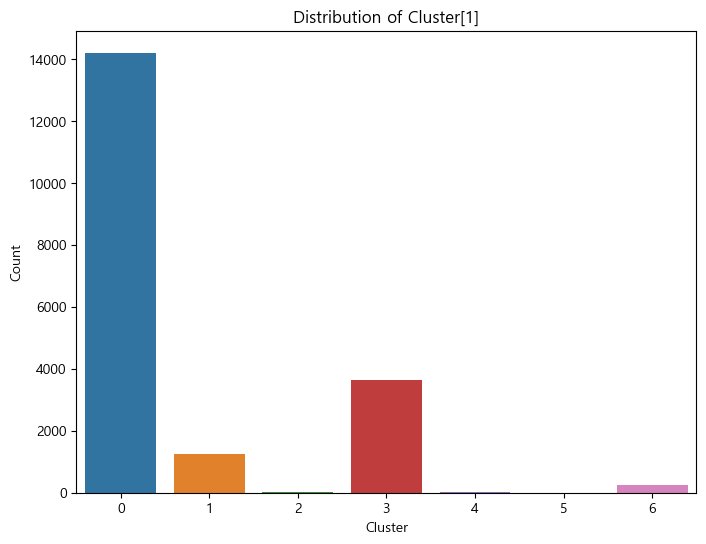

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each cluster
cluster_counts = df_new['cluster'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of Cluster[1]')
plt.show()


In [106]:
# 'Prediction'이 0인 경우만 남기기
validation_df_filtered = validation_df[validation_df['Prediction'] == 0]


In [110]:
validation_df_filtered.head(100)

,TARGET_26,계절총액_26,등급_6,월평균액_6,평균구매품목수6,총방문횟수26,주말비율6,심야비율_6,오전비율_6,오후비율_6,저녁비율_6,새벽비율_6,C0_누적_26,C0_절대_26,C1_누적_26,C1_절대_26,C2_누적_26,C2_절대_26,C3_누적_26,C3_절대_26,C4_누적_26,C4_절대_26,C5_누적_26,C5_절대_26,C6_누적_26,C6_절대_26,C7_누적_26,C7_절대_26,C8_누적_26,C8_절대_26,C9_누적_26,C9_절대_26,C10_누적_26,C10_절대_26,C11_누적_26,C11_절대_26,C12_누적_26,C12_절대_26,C13_누적_26,C13_절대_26,A사비율26,B사비율26,C사비율26,D사비율26,T_누적_26,T_절대_26,거주지역_0,거주지역_강원,거주지역_경남,거주지역_경북,거주지역_광주,거주지역_대구,거주지역_대전,거주지역_부산,거주지역_서울,거주지역_세종,거주지역_수도권,거주지역_울산,거주지역_전남,거주지역_전북,거주지역_제주,거주지역_충남,거주지역_충북,남성_학생층,여성_학생층,남성_청년층,여성_청년층,남성_중년층,여성_중년층,남성_노년층,여성_노년층,Prediction,Prob_0,Prob_1
0,0,6.250124e+07,5,8.645718e+06,1.89,486.0,0.31,0.01,0.12,0.65,0.22,0.0,2,4,2,10,2,6,0,0,0,14,7,7,0,0,0,0,0,18,-9,11,-1,3,3,19,2,4,0,30,0.798726,0.067516,0.133758,0.000000,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.542377,0.457623
1,1,6.035115e+07,5,9.364654e+06,1.63,418.0,0.31,0.00,0.03,0.77,0.20,0.0,6,8,2,2,0,0,0,0,0,4,8,26,0,18,0,0,9,27,8,22,0,8,1,5,1,3,6,10,0.956332,0.021834,0.000000,0.021834,0,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.620993,0.379007
4,0,7.547575e+06,1,8.152466e+05,1.50,262.0,0.45,0.00,0.00,0.85,0.15,0.0,3,15,5,7,3,21,0,2,8,14,7,7,0,0,0,0,8,8,0,16,5,17,0,10,6,6,7,7,0.991031,0.000000,0.000000,0.008969,4,14,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.656530,0.343470
5,0,1.567074e+07,4,2.786042e+06,1.84,506.0,0.03,0.00,0.07,0.93,0.00,0.0,3,7,4,10,-1,1,0,0,0,14,0,14,0,0,9,9,0,0,8,26,0,4,4,12,1,15,-1,3,0.247379,0.718029,0.034591,0.000000,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.675601,0.324399
10,1,9.349129e+07,5,3.061206e+07,1.38,362.0,0.46,0.00,0.00,0.45,0.55,0.0,2,8,2,10,0,2,9,9,8,20,0,16,0,16,0,18,9,9,9,9,0,16,-7,23,-1,17,-9,27,0.894422,0.035857,0.069721,0.000000,0,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.582548,0.417452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,1,5.739483e+07,5,2.454830e+07,1.29,417.0,0.23,0.00,0.07,0.78,0.15,0.0,6,8,5,9,2,2,-9,27,-6,14,2,16,0,0,0,0,-8,8,0,18,-2,16,1,3,0,18,0,18,0.643388,0.002972,0.353640,0.000000,-1,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.550565,0.449435
399,1,8.241443e+07,5,1.526099e+07,1.97,442.0,0.18,0.00,0.01,0.63,0.36,0.0,2,10,0,0,0,0,0,0,1,1,1,19,0,0,0,0,8,8,0,16,1,7,0,0,-1,1,0,4,0.841820,0.141928,0.016251,0.000000,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.518729,0.481271
404,0,1.503295e+07,3,2.163849e+06,1.33,301.0,0.59,0.00,0.00,0.97,0.03,0.0,3,5,6,8,0,14,0,0,6,8,-3,5,0,0,0,0,9,9,7,9,1,3,7,7,7,13,0,16,0.996040,0.003960,0.000000,0.000000,2,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.582203,0.417797
411,0,3.081750e+07,5,6.046884e+06,2.04,543.0,0.05,0.01,0.00,0.71,0.28,0.0,0,4,-2,2,0,2,0,0,-3,5,0,16,0,0,0,0,0,0,-8,26,1,5,1,5,-3,7,0,16,0.492366,0.111641,0.395992,0.000000,1,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.517633,0.482367


In [111]:
# 'Prob_0'와 'Prob_1' 열 제거
validation_df_filtered = validation_df_filtered.drop(['Prob_0', 'Prob_1'], axis=1)


In [112]:
validation_df_filtered.head()

,TARGET_26,계절총액_26,등급_6,월평균액_6,평균구매품목수6,총방문횟수26,주말비율6,심야비율_6,오전비율_6,오후비율_6,저녁비율_6,새벽비율_6,C0_누적_26,C0_절대_26,C1_누적_26,C1_절대_26,C2_누적_26,C2_절대_26,C3_누적_26,C3_절대_26,C4_누적_26,C4_절대_26,C5_누적_26,C5_절대_26,C6_누적_26,C6_절대_26,C7_누적_26,C7_절대_26,C8_누적_26,C8_절대_26,C9_누적_26,C9_절대_26,C10_누적_26,C10_절대_26,C11_누적_26,C11_절대_26,C12_누적_26,C12_절대_26,C13_누적_26,C13_절대_26,A사비율26,B사비율26,C사비율26,D사비율26,T_누적_26,T_절대_26,거주지역_0,거주지역_강원,거주지역_경남,거주지역_경북,거주지역_광주,거주지역_대구,거주지역_대전,거주지역_부산,거주지역_서울,거주지역_세종,거주지역_수도권,거주지역_울산,거주지역_전남,거주지역_전북,거주지역_제주,거주지역_충남,거주지역_충북,남성_학생층,여성_학생층,남성_청년층,여성_청년층,남성_중년층,여성_중년층,남성_노년층,여성_노년층,Prediction
0,0,6.250124e+07,5,8.645718e+06,1.89,486.0,0.31,0.01,0.12,0.65,0.22,0.0,2,4,2,10,2,6,0,0,0,14,7,7,0,0,0,0,0,18,-9,11,-1,3,3,19,2,4,0,30,0.798726,0.067516,0.133758,0.000000,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,6.035115e+07,5,9.364654e+06,1.63,418.0,0.31,0.00,0.03,0.77,0.20,0.0,6,8,2,2,0,0,0,0,0,4,8,26,0,18,0,0,9,27,8,22,0,8,1,5,1,3,6,10,0.956332,0.021834,0.000000,0.021834,0,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,7.547575e+06,1,8.152466e+05,1.50,262.0,0.45,0.00,0.00,0.85,0.15,0.0,3,15,5,7,3,21,0,2,8,14,7,7,0,0,0,0,8,8,0,16,5,17,0,10,6,6,7,7,0.991031,0.000000,0.000000,0.008969,4,14,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0,1.567074e+07,4,2.786042e+06,1.84,506.0,0.03,0.00,0.07,0.93,0.00,0.0,3,7,4,10,-1,1,0,0,0,14,0,14,0,0,9,9,0,0,8,26,0,4,4,12,1,15,-1,3,0.247379,0.718029,0.034591,0.000000,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10,1,9.349129e+07,5,3.061206e+07,1.38,362.0,0.46,0.00,0.00,0.45,0.55,0.0,2,8,2,10,0,2,9,9,8,20,0,16,0,16,0,18,9,9,9,9,0,16,-7,23,-1,17,-9,27,0.894422,0.035857,0.069721,0.000000,0,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [113]:
validation_df_filtered = validation_df_filtered.drop(['Prediction' ], axis=1)

In [115]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#표준화
sc = StandardScaler()
cc_scaled = sc.fit_transform(validation_df_filtered)
cc_scaled = pd.DataFrame(cc_scaled) 
cc_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70
0,-0.443180,0.252074,1.095364,0.101608,-0.145410,0.400610,-0.173783,-0.434644,0.361052,0.726371,-0.672615,-0.054325,-0.096541,-0.751864,0.106084,1.090005,0.208810,-0.176117,0.036034,-0.885464,-0.240894,1.079140,1.966658,-0.035422,-0.105872,-0.436713,0.005091,-0.398323,-0.188884,0.825246,-2.081939,-0.247945,-0.957319,-0.625241,0.673231,1.639009,0.237469,-0.896599,-0.171440,2.191737,0.709754,-0.665541,-0.130856,-0.089060,-0.972048,-0.838507,-0.148018,-0.093005,-0.20768,-0.120853,-0.192786,-0.084228,-0.171228,-0.339818,0.744326,-0.063226,-0.221731,-0.065623,-0.078507,-0.153333,-0.024757,-0.089594,-0.055427,-0.046353,-0.093005,-0.170278,-0.356955,-0.287332,-0.606959,6.350521,-0.425243
1,2.256417,0.225852,1.095364,0.139295,-0.387121,-0.130935,-0.173783,-0.511427,-0.536310,1.283826,-0.773399,-0.054325,1.534539,0.114421,0.106084,-0.973255,-0.617571,-1.539806,0.036034,-0.885464,-0.240894,-0.716402,2.268729,2.628075,-0.105872,2.368582,0.005091,-0.398323,1.690044,1.803772,1.378504,1.039268,-0.468172,0.590174,0.038859,-0.589267,-0.077452,-1.066975,1.213510,-0.064651,1.138490,-0.805547,-0.568167,0.432425,-0.972048,0.326978,-0.148018,-0.093005,-0.20768,-0.120853,-0.192786,-0.084228,-0.171228,-0.339818,0.744326,-0.063226,-0.221731,-0.065623,-0.078507,-0.153333,-0.024757,-0.089594,-0.055427,-0.046353,-0.093005,-0.170278,-0.356955,-0.287332,-0.606959,6.350521,-0.425243
2,-0.443180,-0.418144,-1.620174,-0.308863,-0.507976,-1.350361,0.619626,-0.511427,-0.835431,1.655463,-1.025360,-0.054325,0.311229,1.630420,1.450322,0.316282,0.622001,3.233105,0.036034,-0.655551,2.223714,1.079140,1.966658,-0.035422,-0.105872,-0.436713,0.005091,-0.398323,1.481275,-0.262006,-0.249940,0.337152,1.977560,2.777922,-0.278327,0.206546,1.497153,-0.555848,1.444335,-0.403109,1.232883,-0.872464,-0.568167,0.125146,1.211466,2.657950,-0.148018,-0.093005,-0.20768,-0.120853,-0.192786,-0.084228,-0.171228,-0.339818,0.744326,-0.063226,-0.221731,-0.065623,-0.078507,-0.153333,-0.024757,-0.089594,-0.055427,-0.046353,-0.093005,-0.170278,-0.356955,-0.287332,-0.606959,6.350521,-0.425243
3,-0.443180,-0.319074,0.416480,-0.205554,-0.191893,0.556946,-1.760600,-0.511427,-0.137483,2.027100,-1.781242,-0.054325,0.311229,-0.102150,1.002243,1.090005,-1.030762,-1.312524,0.036034,-0.885464,-0.240894,1.079140,-0.147844,0.945867,-0.105872,-0.436713,4.160260,0.992778,-0.188884,-1.131807,1.378504,1.507345,-0.468172,-0.382158,0.990417,0.524871,-0.077452,0.977534,-0.402264,-0.854386,-0.790078,1.328153,-0.455074,-0.089060,-0.972048,-0.838507,-0.148018,10.752076,-0.20768,-0.120853,-0.192786,-0.084228,-0.171228,-0.339818,-1.343496,-0.063226,-0.221731,-0.065623,-0.078507,-0.153333,-0.024757,-0.089594,-0.055427,-0.046353,-0.093005,-0.170278,-0.356955,-0.287332,-0.606959,-0.157467,2.351595
4,2.256417,0.630031,1.095364,1.253077,-0.619534,-0.568678,0.676298,-0.511427,-0.835431,-0.202721,0.990325,-0.054325,-0.096541,0.114421,0.106084,1.090005,-0.617571,-1.085243,2.219249,0.149144,2.223714,2.156465,-0.147844,1.226235,-0.105872,2.056883,0.005091,2.383880,1.690044,-0.153281,1.582059,-0.481983,-0.468172,2.534839,-2.498630,2.275660,-0.707294,1.318285,-2.248863,1.853278,0.970077,-0.762571,-0.340219,-0.089060,-0.972048,0.326978,-0.148018,-0.093005,-0.20768,-0.120853,-0.192786,-0.084228,-0.171228,-0.339818,0.744326,-0.063226,-0.221731,-0.065623,-0.078507,-0.153333,-0.024757,-0.089594,-0.055427,-0.046353,-0.093005,-0.170278,-0.356955,-0.287332,-0.606959,6.350521,-0.425243


In [120]:
# K-Means 모델과 군집 예측값을 생성

# 클러스터 모델 생성 파라미터는 원할 경우 추가
clust_model = KMeans(n_clusters = 6 # 클러스터 갯수
#                      , n_init=10 # initial centroid를 몇번 샘플링한건지, 데이터가 많으면 많이 돌릴수록안정화된 결과가 나옴
#                      , max_iter=500 # KMeans를 몇번 반복 수행할건지, K가 큰 경우 1000정도로 높여준다
#                      , random_state = 42
#                      , algorithm='auto'
                    )

# 생성한 모델로 데이터를 학습시킴
clust_model.fit(validation_df_filtered) # unsupervised learning 

# 결과 값을 변수에 저장
centers = clust_model.cluster_centers_ # 각 군집의 중심점
pred = clust_model.predict(validation_df_filtered) # 각 예측군집

print(pd.DataFrame(centers))
print(pred[:10]) 
# 군집을 나누는 걸 학습시켯다 이제 원본에 넣어보자

         0             1         2             3         4           5   \
0  0.097378  1.714456e+07  2.698034  2.418678e+06  2.251381  426.274813   
1  0.333333  7.510454e+08  4.500000  1.187799e+08  1.853333  471.000000   
2  0.666667  1.804854e+09  3.666667  3.122651e+08  1.140000  316.000000   
3  0.400000  1.291291e+08  4.880952  2.328052e+07  1.622286  469.076190   
4  0.256556  5.620194e+07  4.644242  8.956159e+06  1.666237  444.299886   
5  0.481481  3.381406e+08  4.851852  6.028191e+07  1.665185  525.185185   

         6         7         8         9         10        11        12  \
0  0.315496  0.091798  0.089335  0.457186  0.357879  0.000810  2.464419   
1  0.325833  0.073333  0.077500  0.472500  0.375833  0.000000  0.666667   
2  0.113333  0.003333  0.046667  0.460000  0.483333  0.000000  2.666667   
3  0.397333  0.015667  0.079238  0.555333  0.349429  0.000143  1.404762   
4  0.388369  0.018267  0.072406  0.567241  0.342201  0.000068  1.949829   
5  0.373333  0.044074  0

In [121]:
df_new = validation_df_filtered.copy()

In [122]:
df_new['cluster'] = pred # pred 는 위에서 봣듯이 군집예측임 이걸 원본에 넣음
df_new.head()

,TARGET_26,계절총액_26,등급_6,월평균액_6,평균구매품목수6,총방문횟수26,주말비율6,심야비율_6,오전비율_6,오후비율_6,저녁비율_6,새벽비율_6,C0_누적_26,C0_절대_26,C1_누적_26,C1_절대_26,C2_누적_26,C2_절대_26,C3_누적_26,C3_절대_26,C4_누적_26,C4_절대_26,C5_누적_26,C5_절대_26,C6_누적_26,C6_절대_26,C7_누적_26,C7_절대_26,C8_누적_26,C8_절대_26,C9_누적_26,C9_절대_26,C10_누적_26,C10_절대_26,C11_누적_26,C11_절대_26,C12_누적_26,C12_절대_26,C13_누적_26,C13_절대_26,A사비율26,B사비율26,C사비율26,D사비율26,T_누적_26,T_절대_26,거주지역_0,거주지역_강원,거주지역_경남,거주지역_경북,거주지역_광주,거주지역_대구,거주지역_대전,거주지역_부산,거주지역_서울,거주지역_세종,거주지역_수도권,거주지역_울산,거주지역_전남,거주지역_전북,거주지역_제주,거주지역_충남,거주지역_충북,남성_학생층,여성_학생층,남성_청년층,여성_청년층,남성_중년층,여성_중년층,남성_노년층,여성_노년층,cluster
0,0,6.250124e+07,5,8.645718e+06,1.89,486.0,0.31,0.01,0.12,0.65,0.22,0.0,2,4,2,10,2,6,0,0,0,14,7,7,0,0,0,0,0,18,-9,11,-1,3,3,19,2,4,0,30,0.798726,0.067516,0.133758,0.000000,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4
1,1,6.035115e+07,5,9.364654e+06,1.63,418.0,0.31,0.00,0.03,0.77,0.20,0.0,6,8,2,2,0,0,0,0,0,4,8,26,0,18,0,0,9,27,8,22,0,8,1,5,1,3,6,10,0.956332,0.021834,0.000000,0.021834,0,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4
4,0,7.547575e+06,1,8.152466e+05,1.50,262.0,0.45,0.00,0.00,0.85,0.15,0.0,3,15,5,7,3,21,0,2,8,14,7,7,0,0,0,0,8,8,0,16,5,17,0,10,6,6,7,7,0.991031,0.000000,0.000000,0.008969,4,14,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0,1.567074e+07,4,2.786042e+06,1.84,506.0,0.03,0.00,0.07,0.93,0.00,0.0,3,7,4,10,-1,1,0,0,0,14,0,14,0,0,9,9,0,0,8,26,0,4,4,12,1,15,-1,3,0.247379,0.718029,0.034591,0.000000,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10,1,9.349129e+07,5,3.061206e+07,1.38,362.0,0.46,0.00,0.00,0.45,0.55,0.0,2,8,2,10,0,2,9,9,8,20,0,16,0,16,0,18,9,9,9,9,0,16,-7,23,-1,17,-9,27,0.894422,0.035857,0.069721,0.000000,0,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3


In [123]:
cluster_mean= df_new.groupby('cluster').mean()
cluster_mean

,TARGET_26,계절총액_26,등급_6,월평균액_6,평균구매품목수6,총방문횟수26,주말비율6,심야비율_6,오전비율_6,오후비율_6,저녁비율_6,새벽비율_6,C0_누적_26,C0_절대_26,C1_누적_26,C1_절대_26,C2_누적_26,C2_절대_26,C3_누적_26,C3_절대_26,C4_누적_26,C4_절대_26,C5_누적_26,C5_절대_26,C6_누적_26,C6_절대_26,C7_누적_26,C7_절대_26,C8_누적_26,C8_절대_26,C9_누적_26,C9_절대_26,C10_누적_26,C10_절대_26,C11_누적_26,C11_절대_26,C12_누적_26,C12_절대_26,C13_누적_26,C13_절대_26,A사비율26,B사비율26,C사비율26,D사비율26,T_누적_26,T_절대_26,거주지역_0,거주지역_강원,거주지역_경남,거주지역_경북,거주지역_광주,거주지역_대구,거주지역_대전,거주지역_부산,거주지역_서울,거주지역_세종,거주지역_수도권,거주지역_울산,거주지역_전남,거주지역_전북,거주지역_제주,거주지역_충남,거주지역_충북,남성_학생층,여성_학생층,남성_청년층,여성_청년층,남성_중년층,여성_중년층,남성_노년층,여성_노년층
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.097151,1.719012e+07,2.701541,2.426188e+06,2.250070,426.198038,0.315619,0.091602,0.089234,0.457725,0.357646,0.000808,2.463802,6.991593,1.950490,5.570294,1.744045,6.956562,-0.134984,7.514713,0.877627,7.551144,0.650163,6.973377,0.349369,3.070528,0.037833,3.057917,0.886502,9.311537,1.246614,12.362915,1.196637,6.397011,1.120504,9.295189,1.470341,9.717889,0.799626,10.010276,0.446493,0.328616,0.219734,0.005157,2.305465,5.765530,0.022419,0.012611,0.033162,0.014946,0.037833,0.006539,0.032695,0.090612,0.636618,0.004671,0.055114,0.004671,0.009341,0.022887,0.000467,0.011210,0.004204,0.002802,0.011677,0.037366,0.124708,0.084073,0.283979,0.017749,0.123307
1,0.333333,7.510454e+08,4.500000,1.187799e+08,1.853333,471.000000,0.325833,0.073333,0.077500,0.472500,0.375833,0.000000,0.666667,5.500000,0.166667,6.333333,-1.083333,8.750000,-0.666667,6.000000,-0.083333,12.250000,-1.000000,11.333333,-1.333333,8.500000,0.000000,0.000000,-1.916667,6.416667,0.083333,11.416667,-0.666667,6.666667,-0.250000,10.250000,-0.250000,9.583333,0.750000,8.083333,0.540097,0.226286,0.232628,0.000988,1.083333,2.916667,0.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.166667,0.583333,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.250000,0.166667,0.250000,0.083333,0.000000
2,0.666667,1.804854e+09,3.666667,3.122651e+08,1.140000,316.000000,0.113333,0.003333,0.046667,0.460000,0.483333,0.000000,2.666667,5.333333,0.666667,2.000000,-1.666667,11.666667,0.000000,0.000000,3.333333,8.666667,4.333333,16.333333,0.000000,0.000000,0.000000,0.000000,2.666667,2.666667,0.000000,5.333333,1.000000,3.666667,1.666667,11.666667,-3.333333,14.666667,1.000000,12.333333,0.613486,0.350585,0.035928,0.000000,2.666667,3.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3,0.400000,1.291291e+08,4.880952,2.328052e+07,1.622286,469.076190,0.397333,0.015667,0.079238,0.555333,0.349429,0.000143,1.404762,9.042857,1.114286,6.809524,0.942857,5.942857,-0.395238,6.880952,0.952381,9.609524,-0.171429,8.628571,0.409524,2.238095,-0.157143,1.919048,1.233333,12.319048,1.347619,14.890476,0.347619,3.357143,0.376190,7.023810,0.723810,8.171429,0.404762,8.185714,0.741861,0.168200,0.089089,0.000851,0.409524,1.904762,0.019048,0.000000,0.057143,0.000000,0.028571,0.014286,0.038095,0.157143,0.647619,0.000000,0.009524,0.000000,0.000000,0.028571,0.000000,0.000000,0.000000,0.000000,0.000000,0.004762,0.080952,0.071429,0.223810,0.047619,0.238095
4,0.258028,5.631403e+07,4.646789,8.975207e+06,1.666101,444.591743,0.388486,0.018326,0.072557,0.566548,0.342683,0.000069,1.948394,8.319954,1.511468,6.016055,1.083716,6.430046,-0.092890,8.448394,0.543578,8.616972,0.268349,7.545872,0.045872,2.197248,-0.096330,1.619266,0.930046,12.725917,1.209862,14.572248,0.556193,4.120413,0.424312,7.550459,0.848624,8.396789,0.711009,12.626147,0.710876,0.206668,0.081384,0.001073,0.875000,3.560780,0.020642,0.001147,0.059633,0.013761,0.032110,0.006881,0.017202,0.121560,0.657110,0.003440,0.034404,0.004587,0.000000,0.022936,0.001147,0.002294,0.001147,0.001147,0.002294,0.012615,0.089450,0.051606,0.247706,0.034404,0.208716
5,0.481481,3.381406e+08,4.851852,6.028191e+07,1.

In [125]:
# 각 열에 대한 랭킹 계산
column_ranks = cluster_mean.rank(ascending=False)

# 랭킹 결과 출력
print(column_ranks)


         TARGET_26  계절총액_26  등급_6  월평균액_6  평균구매품목수6  총방문횟수26  주말비율6  심야비율_6  \
cluster                                                                       
0              6.0      6.0   6.0     6.0       1.0      5.0    5.0     1.0   
1              4.0      2.0   4.0     2.0       2.0      2.0    4.0     2.0   
2              1.0      1.0   5.0     1.0       6.0      6.0    6.0     6.0   
3              3.0      4.0   1.0     4.0       5.0      3.0    1.0     5.0   
4              5.0      5.0   3.0     5.0       3.0      4.0    2.0     4.0   
5              2.0      3.0   2.0     3.0       4.0      1.0    3.0     3.0   

         오전비율_6  오후비율_6  저녁비율_6  새벽비율_6  C0_누적_26  C0_절대_26  C1_누적_26  \
cluster                                                                 
0           1.0     6.0     4.0     1.0       2.0       4.0       1.0   
1           3.0     4.0     3.0     5.5       5.5       5.0       6.0   
2           6.0     5.0     1.0     5.5       1.0       6.0       5.0   
3 

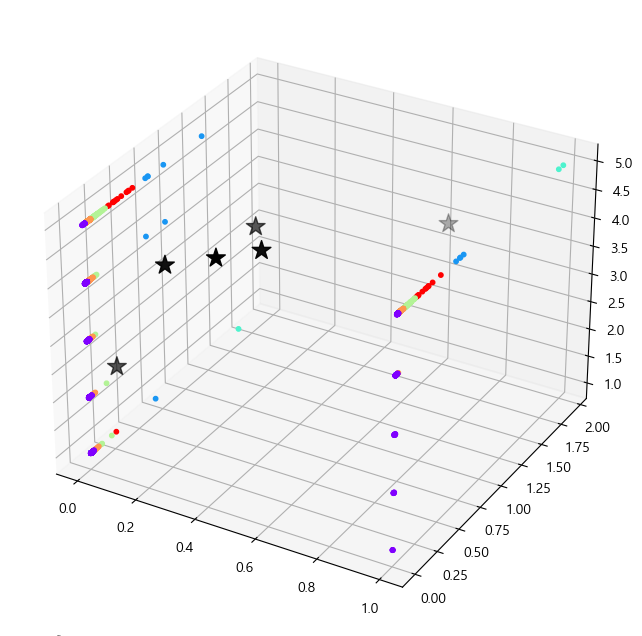

In [124]:
# 3차원으로 시각화하기

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X = df_new

# 데이터 scatterplot
ax.scatter(  X.iloc[:,0]
           , X.iloc[:,1]
           , X.iloc[:,2]
           , c = X.cluster
           , s = 10
           , cmap = "rainbow"
           , alpha = 1
          )

# centroid scatterplot
ax.scatter(centers[:,0],centers[:,1],centers[:,2] ,c='black', s=200, marker='*')


plt.show()

### 연관분석
연관규칙분석은 기업의 데이터 베이스에서 상품구매, 서비스 등 일련의 거래 또는 사건 간의 규칙을 찾아내는 거시며 그래서 흔히 장바구니분석이라고 불린다.

지지도는 전체 거래 중에서 품목 A 와 B가 동시에 포함되는 거래의 비율이다. 즉, 얼마나 빈번하게 나타나는 경우인지를 설명하는 절대적인 값이다.

신뢰도는 품목 A가 포함된 거래 중에서 품목 A, B를 동시에 포함될 확률이다. 이는 연관성의 정도를 파악할 수 있다.

향상도는 품목 A가 구매되지 않았을 때 품목 B를 구매한 고객 대비 품목 A를 구매한 후 품목B를 구매하는 고객에 대한 확률 증가 비율이다.

순차패턴분석은 구매순서가 고려되어 상품 간의 규칙을 찾는 기법이다

고객의 대규모 거래 데이터로부터 함께 구매가 발생하는 규칙 (A제품과 B제품을 동시에 구매하는 경우)을 도출하여 고객이 특정 상품 구매 시 이와 연관성 높은 상품을 추천할 수 있다.

연관성규칙의 일반적인 형태는 if A then B 형태이다. 연관규칙을 파악하면 세트메뉴를 구성하거나 쿠폰을 발행하는 등의 교차판매를 할 때 매우 효과적이다.예로 아메리카노를 마시는 손님 중 약 33%가 치즈케이크를 먹는다 등과 같은 연관규칙을 발견할 수 있다.

연관규칙분석을 통해 도출된 연관규칙이 유의미 한것인지 평가하기 위한 측도에는 지지도, 신뢰도, 향상도 의 측정지표를 활용한다.

지지도: 전체 거래 중에서 품목 A와 B가 동시에 포함되는 거래의 비율이다. A와 B가 동시에 포함된 거래수 / 전체 거래수

신뢰도: 품목 A가 포함된 거래 중에서 품목 A, B 가 동시에 포함될 확률이다. A와 B가 동시에 포함된 거래수 / A를 포함한 거래수 즉, 품목 A 를 구매한 사람이 품목 B도 구매하더라 이다.

향상도: 품목 A가구매되지 않았을 때 품목 B를 구매한 고객 대비 품목 A를 구매한 후 품목B를 구매하는 고객에 대한 확률 증가 비율이다. A와 B를 포함한 거래수 / A 를 포함한 거래수 x B 를 포함한 거래수. 향상도가 1 보다 크거나 작다면 우연적 기회보다 우수함을 의미한다.

Apriori 알고리즘: 연관분석 절차는 최소지지도 보다 큰 집합만을 대상으로 높은 지지도를 갖는 품목집합을 찾는 것이다. 최소지지도 이상을 갖는 품목집합을 빈발품목집합이라고 하는데 여기서 최소지지도 이상의 빈발품목집합을 찾아내는 연관규칙을 계산하는 것이다.

Apriori 절차: 최소지지도를 설정, 개별 품목 중에서 최소지지도를 넘는 모든 품목을 찾음, 그중에서 최소지지도를 넘는 2가지 품목 집합을 찾음, 전에 차은 품목집합을 결합하여 최소지지도를 넘는 3가지 품목집합찾음, 반복적으로 수행.

군집 분석 후 군집화를 한 상태에서 연관 규칙 분석을 수행하는 것은 일반적으로 의미 있는 접근 방법입니다. 군집화를 통해 데이터를 서로 다른 군집으로 그룹화하면, 각 군집 내의 데이터 포인트들은 유사한 특성을 가지고 있을 가능성이 높습니다. 이를 통해 군집 내에서 발생하는 연관 규칙을 탐색할 수 있습니다.

연관 규칙 분석은 주어진 데이터 집합에서 아이템 간의 관계를 찾아내는 데이터 마이닝 기법입니다. 주로 지지도(Support), 신뢰도(Confidence), 향상도(Lift) 등의 지표를 사용하여 규칙의 중요성을 평가합니다.

군집화된 데이터에 대해 연관 규칙 분석을 수행하기 위해 일반적으로 다음과 같은 절차를 따릅니다:

군집화된 각 군집에서 데이터를 추출합니다.
추출한 데이터를 연관 규칙 분석에 적합한 형식으로 변환합니다. 이는 일반적으로 트랜잭션 형태로 변환하거나, 아이템 집합 형태로 변환하는 등의 작업을 포함할 수 있습니다.
변환된 데이터에 대해 연관 규칙 분석 알고리즘을 적용합니다. 대표적인 알고리즘으로는 Apriori 알고리즘과 FP-Growth 알고리즘이 있습니다.
분석 결과로 얻은 연관 규칙을 해석하고, 필요에 따라 비즈니스 의사 결정에 활용합니다.
주의할 점은 군집화 결과에 따라 군집 내 데이터의 분포나 특성이 다를 수 있다는 점입니다. 따라서 군집 간 연관 규칙을 분석하는 것보다는 군집 내부의 연관 규칙을 탐색하는 것이 일반적입니다. 각 군집 내에서 연관 규칙을 분석하고, 군집 간의 차이를 비교하는 것이 좋습니다.

또한, 군집화와 연관 규칙 분석은 상호 보완적인 기법이지만 독립적으로 수행할 수도 있습니다. 데이터에 따라 군집화와 연관 규칙 분석을 동시에 수행하는 것이 유익한 경우도 있습니다. 이는 데이터의 특성과 목표에 따라 결정해야 합니다.

연관분석(Apriori, FP growth)의 단점
 연관분석은 개인화 추천시스템의 가장 기본이 되는 방법이다. 다만 여기에는 몇 가지 문제점이 있다. 첫 번째는 최소 지지도를 분석가가 주관적으로 설정한다는 것이다. 최적화된 지지도는 아마 상품별로 판매상황별로 다를 것이기 때문에 분석가의 주관적인 최소 지지도 설정에 문제가 있을 수 있다. 두 번째는 상관관계는 파악할 수 있지만 인과관계를 파악하기 어렵다는 점이며, 마지막으로 세 번째는 거래량이 적은 상품들은 자연히 지지도가 낮게 나와 거래량이 적은 상품들에 대한 상품들은 추천에서 배제될 수 있다는 사실이다.



https://investraveler.tistory.com/234

연관 규칙 분석은 주어진 데이터에서 아이템 간의 관계를 탐색하는 것입니다. 일반적으로 연관 규칙 분석에서는 아이템 간의 존재 유무를 나타내기 위해 불리언 (True/False) 값이 사용됩니다. 이는 아이템이 발생했는지 아닌지를 나타내는 이진 변수로 해석될 수 있습니다.

하지만 숫자형 변수를 사용하여 연관 규칙을 도출하는 것도 가능합니다. 이 경우 숫자 변수를 범주형 변수로 변환하거나, 이산화(discretization) 등의 전처리 과정을 거쳐야 할 수 있습니다. 이는 데이터와 분석 목적에 따라 달라질 수 있습니다.

숫자형 변수를 사용하는 경우, 적절한 전처리 방법을 선택하여 변수를 범주형 형태로 변환하거나, 연속형 변수를 구간으로 나누어 이산화하는 등의 작업을 수행해야 합니다. 이렇게 함으로써 숫자 변수를 아이템 집합의 일부로 포함시킬 수 있습니다.

따라서, 숫자형 변수를 연관 규칙 분석에 활용할 수 있지만, 적절한 전처리 과정을 거쳐야 합니다. 데이터의 특성과 분석 목적에 맞게 전처리 방법을 선택하고 적용해야 합니다.

In [127]:
pip install mlxtend


     ---------------------------------------- 1.4/1.4 MB 10.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [128]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# 각 군집에서 아이템 발생 빈도 계산
item_counts = df_new.groupby('cluster').sum()

# 연관 분석을 위한 one-hot encoding
itemsets = item_counts.applymap(lambda x: 1 if x > 0 else 0)

# Apriori 알고리즘을 사용하여 연관 규칙 도출
frequent_itemsets = apriori(itemsets, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

# 규칙 결과 출력
print(rules)


C:\Users\thkkk\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


MemoryError: cannot allocate array memory

In [134]:
import pandas as pd
import pyfpgrowth

# 각 군집에서 아이템 발생 빈도 계산
item_counts = df_new.groupby('cluster').sum()

# 아이템 발생 빈도를 리스트 형태로 변환
transactions = item_counts.values.tolist()

# FP-Growth 알고리즘을 사용하여 연관 규칙 도출
patterns = pyfpgrowth.find_frequent_patterns(transactions, min_support_count=2)

# 연관 규칙 도출
rules = pyfpgrowth.generate_association_rules(patterns, min_confidence=0.5)

# 규칙 결과 출력
for rule, confidence in rules.items():
    antecedent = list(rule)
    consequent = list(rule[1])
    print(f"Rule: {antecedent} -> {consequent}")
    print(f"Confidence: {confidence}")
    print("----------------------------")



TypeError: find_frequent_patterns() got an unexpected keyword argument 'min_support_count'

In [139]:
pip install pyfpgrowth


Note: you may need to restart the kernel to use updated packages.


In [161]:
import pandas as pd
import pyfpgrowth

# 각 군집에서 아이템 발생 빈도 계산
item_counts = df_new.groupby('cluster').sum()

# 아이템 발생 빈도를 리스트 형태로 변환
transactions = item_counts.values.tolist()

# 전체 트랜잭션 개수
total_transactions = len(transactions)

# 최소 지지도 임계값 계산
min_support = 0.5 * total_transactions

# FP-Growth 알고리즘을 사용하여 연관 규칙 도출
# FP-Growth 알고리즘을 사용하여 연관 규칙 도출
patterns = pyfpgrowth.find_frequent_patterns(transactions, support_threshold=min_support)


# 연관 규칙 도출
#rules = pyfpgrowth.generate_association_rules()
# 연관 규칙 도출
rules = pyfpgrowth.generate_association_rules(patterns, confidence_threshold=0.5)


# 규칙 결과 출력
for rule, confidence in rules.items():
    antecedent = rule[1]
    consequent = rule[0]
    print(f"Rule: {antecedent} -> {consequent}")
    print(f"Confidence: {confidence}")
    print("----------------------------")




Rule: 4.0 -> 3.0
Confidence: ((0.0, 1.0, 2.0, 8.0), 1.0)
----------------------------
Rule: 4.0 -> 2.0
Confidence: ((0.0, 1.0), 0.5)
----------------------------
Rule: 3.0 -> 2.0
Confidence: ((0.0, 1.0, 8.0), 0.5)
----------------------------
Rule: 4.0 -> 2.0
Confidence: ((0.0, 1.0), 0.5)
----------------------------
Rule: 4.0 -> 3.0
Confidence: ((0.0, 1.0, 2.0, 8.0), 1.0)
----------------------------


IndexError: tuple index out of range

In [162]:
# 규칙 결과 출력
for rule, confidence in rules.items():
    antecedent = rule[0]
    consequent = rule[1]
    print(f"Rule: {antecedent} -> {consequent}")
    print(f"Confidence: {confidence}")
    print("----------------------------")


Rule: 3.0 -> 4.0
Confidence: ((0.0, 1.0, 2.0, 8.0), 1.0)
----------------------------
Rule: 2.0 -> 4.0
Confidence: ((0.0, 1.0), 0.5)
----------------------------
Rule: 2.0 -> 3.0
Confidence: ((0.0, 1.0, 8.0), 0.5)
----------------------------
Rule: 2.0 -> 4.0
Confidence: ((0.0, 1.0), 0.5)
----------------------------
Rule: 3.0 -> 4.0
Confidence: ((0.0, 1.0, 2.0, 8.0), 1.0)
----------------------------


IndexError: tuple index out of range

In [163]:
# 규칙 결과 출력
for rule, confidence in rules.items():
    if len(rule) >= 2:
        antecedent = rule[0]
        consequent = rule[1]
        print(f"Rule: {antecedent} -> {consequent}")
        print(f"Confidence: {confidence}")
        print("----------------------------")


Rule: 3.0 -> 4.0
Confidence: ((0.0, 1.0, 2.0, 8.0), 1.0)
----------------------------
Rule: 2.0 -> 4.0
Confidence: ((0.0, 1.0), 0.5)
----------------------------
Rule: 2.0 -> 3.0
Confidence: ((0.0, 1.0, 8.0), 0.5)
----------------------------
Rule: 2.0 -> 4.0
Confidence: ((0.0, 1.0), 0.5)
----------------------------
Rule: 3.0 -> 4.0
Confidence: ((0.0, 1.0, 2.0, 8.0), 1.0)
----------------------------
Rule: 0.0 -> 4.0
Confidence: ((), 7.575)
----------------------------
Rule: 0.0 -> 10.0
Confidence: ((4.0,), 4.483516483516484)
----------------------------
Rule: 0.0 -> 13.0
Confidence: ((), 11.716417910447761)
----------------------------
Rule: 0.0 -> 3.0
Confidence: ((), 7.744897959183674)
----------------------------
Rule: 0.0 -> 4.0
Confidence: ((), 8.0)
----------------------------
Rule: 0.0 -> 4.0
Confidence: ((), 8.130434782608695)
----------------------------
Rule: 0.0 -> 10.0
Confidence: ((), 13.925925925925926)
----------------------------
Rule: 0.0 -> 3.0
Confidence: ((13.0,),

이 코드는 군집별로 아이템 발생 빈도를 계산하고, FP-Growth 알고리즘을 사용하여 연관 규칙을 도출하는 과정입니다. 아래는 규칙과 신뢰도에 대한 설명입니다:

규칙(Rule): 연관 규칙은 IF-THEN 형식으로 표현되며, antecedent -> consequent 형태입니다. antecedent는 전제 조건이고, consequent는 결과입니다. 이 규칙은 어떤 아이템들이 함께 발생하는지를 나타냅니다.

신뢰도(Confidence): 신뢰도는 규칙의 신뢰성을 나타내는 지표입니다. 연관 규칙의 신뢰도는 antecedent가 주어졌을 때 consequent가 발생할 확률로 해석할 수 있습니다. 신뢰도는 0에서 1 사이의 값으로 표현되며, 값이 높을수록 규칙이 더 신뢰할 만하다는 의미입니다.

위 코드에서는 FP-Growth 알고리즘을 사용하여 연관 규칙을 도출하고, 각 규칙과 그에 해당하는 신뢰도를 출력합니다. 규칙과 신뢰도를 통해 어떤 아이템들이 함께 발생하는지와 그 신뢰도를 확인할 수 있습니다.






아 ㅋㅋ 시발 봐도 모르겟다